In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_columns
pd.set_option("display.max_columns",None)

df=pd.read_csv("startup data.csv")
display(df.head(3))
df.shape

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.00,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.75,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.00,1,acquired


(923, 49)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
Unnamed: 0                  923 non-null int64
state_code                  923 non-null object
latitude                    923 non-null float64
longitude                   923 non-null float64
zip_code                    923 non-null object
id                          923 non-null object
city                        923 non-null object
Unnamed: 6                  430 non-null object
name                        923 non-null object
labels                      923 non-null int64
founded_at                  923 non-null object
closed_at                   335 non-null object
first_funding_at            923 non-null object
last_funding_at             923 non-null object
age_first_funding_year      923 non-null float64
age_last_funding_year       923 non-null float64
age_first_milestone_year    771 non-null float64
age_last_milestone_year     771 non-null float64
relationships              

In [3]:
df.isnull().sum().sort_values(ascending=False).head(10)

closed_at                   588
Unnamed: 6                  493
age_last_milestone_year     152
age_first_milestone_year    152
state_code.1                  1
zip_code                      0
age_first_funding_year        0
milestones                    0
funding_total_usd             0
funding_rounds                0
dtype: int64

In [3]:
df.drop(["Unnamed: 6"],axis=1, inplace=True)
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.drop(["id"], axis=1, inplace=True)

df.head(2)

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.00,0,acquired
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.75,1,acquired


In [4]:
for index, row in df.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])

# "state_code" column and "state_code.1" column must be the same, so we should drop the "state_code.1" and also, 
# "state_code.1" column has a one missing value in the 515. row. 

515 CA nan


In [5]:
df.drop(["state_code.1"], axis=1, inplace=True)

In [6]:
# For analyzing, cleaning and visualizing to data clearly, i want to use specific features which is not including "is_" because, these had created by using get_dummies function ; 
# so now i will create a new dataframe. Then i will use columns that including "is_" for classification step


df_new=df[["state_code","city","name","labels","founded_at","closed_at","first_funding_at","last_funding_at","age_first_funding_year",
           "age_last_funding_year","age_first_milestone_year","age_last_milestone_year","relationships","funding_rounds","funding_total_usd","milestones","category_code",
           "has_angel","avg_participants","is_top500","status"]]

df_new.head(3)

,state_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_angel,avg_participants,is_top500,status
0,CA,San Diego,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,1,1.00,0,acquired
1,CA,Los Gatos,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,0,4.75,1,acquired
2,CA,San Diego,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,web,0,4.00,1,acquired


In [7]:
# For classification, we create a dummies including 0 and 1 values from "status_code" column

df_new=pd.get_dummies(df_new, columns=["status"], drop_first=True)
df_new.head(3)

,state_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_angel,avg_participants,is_top500,status_closed
0,CA,San Diego,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,1,1.00,0,0
1,CA,Los Gatos,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,0,4.75,1,0
2,CA,San Diego,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,web,0,4.00,1,0


In [8]:
# Year columns must be converted to datetime type

df_new.founded_at=pd.to_datetime(df_new.founded_at)
df_new.closed_at=pd.to_datetime(df_new.closed_at)
df_new.first_funding_at=pd.to_datetime(df_new.first_funding_at)
df_new.last_funding_at=pd.to_datetime(df_new.last_funding_at)

df_new.head(4)

,state_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_angel,avg_participants,is_top500,status_closed
0,CA,San Diego,Bandsintown,1,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,1,1.0000,0,0
1,CA,Los Gatos,TriCipher,1,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,0,4.7500,1,0
2,CA,San Diego,Plixi,1,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,web,0,4.0000,1,0
3,CA,Cupertino,Solidcore Systems,1,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,software,0,3.3333,1,0


## Now, let's handle the missing values

In [10]:
# We have missing values in 3 columns 

df_new.isnull().sum().sort_values(ascending=False).head(5)

closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
age_last_funding_year         0
city                          0
dtype: int64

In [11]:
print("How many percentage of missing values in 'closed_at' column                : % {:.2f}". format((df_new.closed_at.isnull().sum())/len(df_new)*100))
print("How many percentage of missing values in 'age_last_milestone_year' column  : % {:.2f}". format((df_new.age_last_milestone_year.isnull().sum())/len(df_new)*100))
print("How many percentage of missing values in 'age_first_milestone_year' column : % {:.2f}". format((df_new.age_first_milestone_year.isnull().sum())/len(df_new)*100))

How many percentage of missing values in 'closed_at' column                : % 63.71
How many percentage of missing values in 'age_last_milestone_year' column  : % 16.47
How many percentage of missing values in 'age_first_milestone_year' column : % 16.47


In [9]:
# I want to drop the "closed_at" column because it has very missing values, it is not necessary for prediction success

df_new.drop(["closed_at"], axis=1, inplace=True)

#### What does it mean "age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year" , let's together analyze it

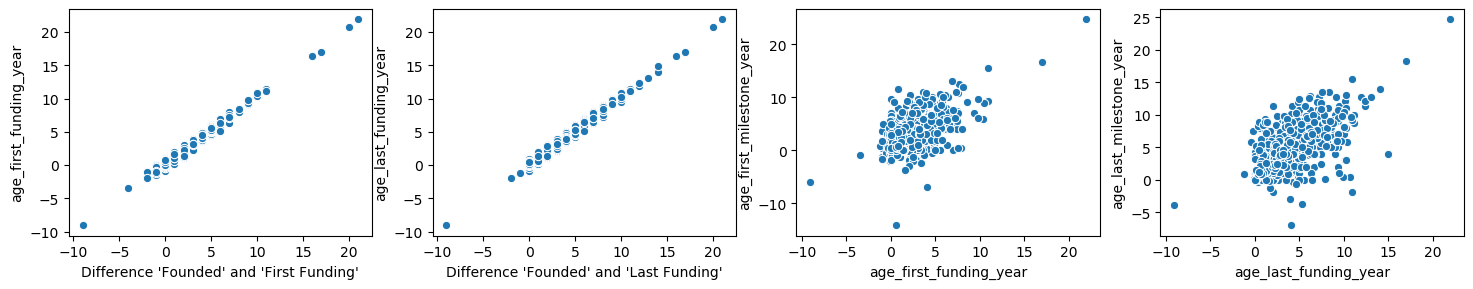

In [13]:
plt.figure(figsize=(18,3),dpi=100)

plt.subplot(1,4,1)
sns.scatterplot((df_new["first_funding_at"].dt.year - df_new["founded_at"].dt.year), df_new["age_first_funding_year"])
plt.xlabel("Difference 'Founded' and 'First Funding'")

plt.subplot(1,4,2)
sns.scatterplot((df_new["last_funding_at"].dt.year- df_new["founded_at"].dt.year), df_new["age_last_funding_year"])
plt.xlabel("Difference 'Founded' and 'Last Funding'");

plt.subplot(1,4,3)
sns.scatterplot(df_new["age_first_funding_year"], df_new["age_first_milestone_year"])

plt.subplot(1,4,4)
sns.scatterplot(df_new["age_last_funding_year"], df_new["age_last_milestone_year"]);


# As we see the graph, we can say high correlation between funding date and age funding. Difference between "last_funding_at" and "founded_at" is related "age_last_funding_year".
# "age_first_funding_year" and "age_last_funding_year" have negative values,it shouldn't be and also it can not be that "founded" date higher than "first_funding_at" and "last_funding_at"
# So we must get the absolute value of columns including negative value

In [14]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df_new[age[a]]<0).any()))
          

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [15]:
for af, rows in df_new.iterrows():
    if rows["age_first_funding_year"]<0:
        print(af, rows["age_first_funding_year"])

23 -1.0
32 -0.1671
71 -0.0301
79 -0.5836
80 -0.0219
104 -0.4959
122 -0.7479
127 -1.011
234 -0.2466
240 -1.0521
263 -1.9863
284 -0.0849
312 -0.4192
340 -0.4986
368 -0.13699999999999998
379 -0.0027
382 -0.4466
397 -0.1671
407 -0.0219
420 -0.3342
431 -1.4712
432 -1.0
466 -0.1808
488 -0.0438
489 -1.1836
499 -0.1288
513 -0.1616
518 -0.2493
536 -0.9178
558 -9.0466
566 -0.2384
567 -0.0082
584 -3.5068
603 -0.0027
609 -0.1534
702 -0.5014
720 -0.1041
763 -0.4959
782 -0.0192
785 -0.1151
788 -0.2521
830 -0.0822
831 -0.8658
847 -1.0
851 -0.3288
875 -0.1671


In [10]:
# we must get the absolute value of columns including negative value

df_new["age_first_funding_year"]=np.abs(df_new["age_first_funding_year"])
df_new["age_last_funding_year"]=np.abs(df_new["age_last_funding_year"])
df_new["age_first_milestone_year"]=np.abs(df_new["age_first_milestone_year"])
df_new["age_last_milestone_year"]=np.abs(df_new["age_last_milestone_year"])

In [16]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(df_new[age[a]]<0).any()))
    
# Now, we get rid of negative values

Is there any negative value in 'age_first_funding_year' column  : False 
Is there any negative value in 'age_last_funding_year' column  : False 
Is there any negative value in 'age_first_milestone_year' column  : False 
Is there any negative value in 'age_last_milestone_year' column  : False 


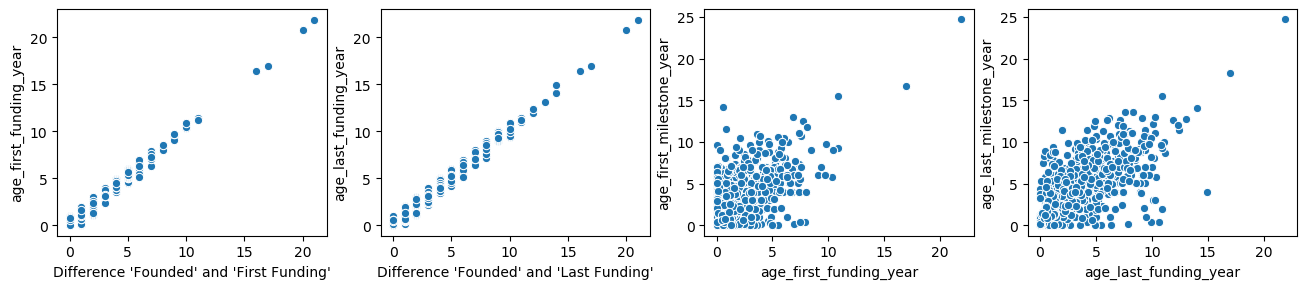

In [17]:
# After we get the absolute, visualize relationships

plt.figure(figsize=(16,3),dpi=100)

plt.subplot(1,4,1)
sns.scatterplot(np.abs(df_new["first_funding_at"].dt.year - df_new["founded_at"].dt.year), df_new["age_first_funding_year"])
plt.xlabel("Difference 'Founded' and 'First Funding'")

plt.subplot(1,4,2)
sns.scatterplot(np.abs(df_new["last_funding_at"].dt.year- df_new["founded_at"].dt.year), df_new["age_last_funding_year"])
plt.xlabel("Difference 'Founded' and 'Last Funding'");

plt.subplot(1,4,3)
sns.scatterplot(df_new["age_first_funding_year"], df_new["age_first_milestone_year"])

plt.subplot(1,4,4)
sns.scatterplot(df_new["age_last_funding_year"], df_new["age_last_milestone_year"]);

In [11]:
# There is a relationship between "age_last_funding_year" and "age_last_milestone_year", they have similar means. That's why, i will fill the missing values by mean() function
# in "age_last_milestone_year" column.

print("Average of first funding year: {:.2f}".format(df_new["age_first_funding_year"].mean()))
print("Average of first milestone year: {:.2f}".format(df_new["age_first_milestone_year"].mean()))
print("Average of last funding year: {:.2f}".format(df_new["age_last_funding_year"].mean()))
print("Average of last milestone year: {:.2f}" .format(df_new["age_last_milestone_year"].mean()))


df_new["age_first_milestone_year"].fillna((df_new["age_first_milestone_year"].mean()), inplace=True)
df_new["age_last_milestone_year"].fillna((df_new["age_last_milestone_year"].mean()), inplace=True)


df_new.isnull().sum().sort_values(ascending=False).head(5)

Average of first funding year: 2.30
Average of first milestone year: 3.23
Average of last funding year: 3.96
Average of last milestone year: 4.82


status_closed    0
is_top500        0
city             0
name             0
labels           0
dtype: int64

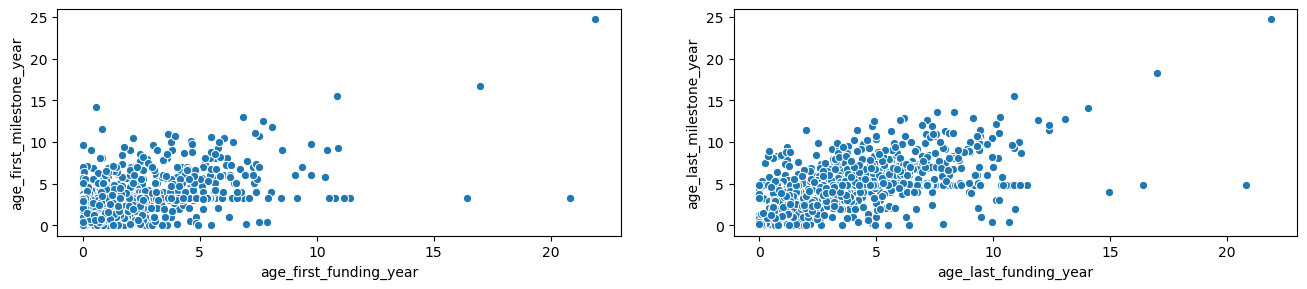

In [18]:
# After we get the absolute, visualize relationships

plt.figure(figsize=(16,3),dpi=100)

plt.subplot(1,2,1)
sns.scatterplot(df_new["age_first_funding_year"], df_new["age_first_milestone_year"])

plt.subplot(1,2,2)
sns.scatterplot(df_new["age_last_funding_year"], df_new["age_last_milestone_year"]);

## Handle the outliers

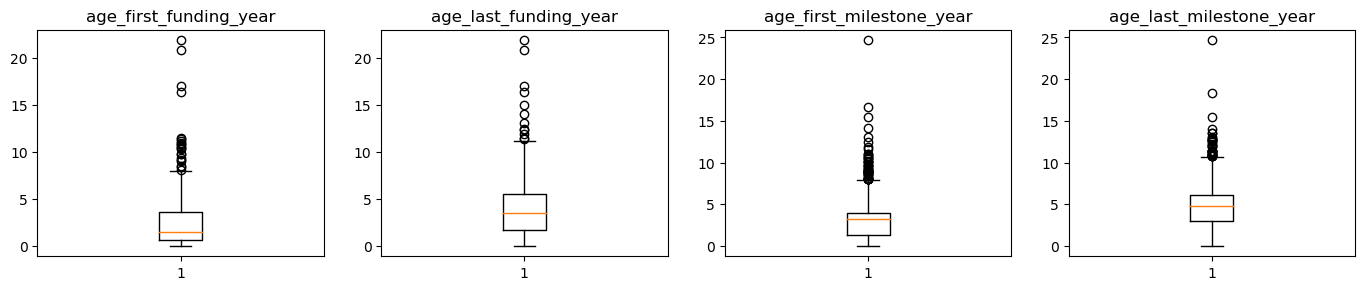

In [19]:
variable=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

plt.figure(figsize=(17,3),dpi=100)
for i in range(len(variable)):
    plt.subplot(1,4,i+1)
    plt.title("{}". format(variable[i]))
    plt.boxplot(df_new[variable[i]]);
    

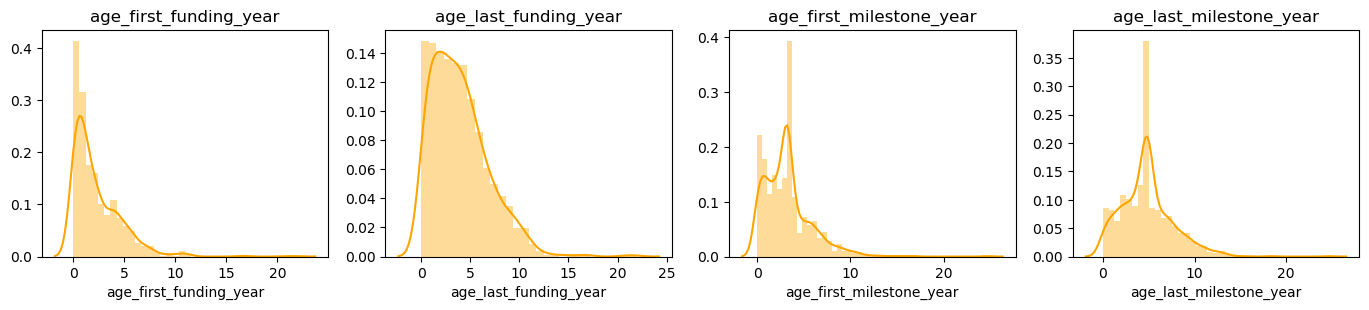

In [20]:
variable=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

plt.figure(figsize=(17,3),dpi=100)
for i in range(len(variable)):
    plt.subplot(1,4,i+1)
    plt.title("{}". format(variable[i]))
    sns.distplot(df_new[variable[i]], color="orange");
    

In [23]:
from scipy.stats import zscore

zscores=zscore(df_new["age_first_funding_year"])

for threshold in range(1,8,1):
    print("Threshold value: {}". format(threshold))
    print("Number of outliers: {}".format(len(np.where(zscores>threshold)[0])))
    print("------------------------")


Threshold value: 1
Number of outliers: 128
------------------------
Threshold value: 2
Number of outliers: 36
------------------------
Threshold value: 3
Number of outliers: 15
------------------------
Threshold value: 4
Number of outliers: 4
------------------------
Threshold value: 5
Number of outliers: 4
------------------------
Threshold value: 6
Number of outliers: 3
------------------------
Threshold value: 7
Number of outliers: 2
------------------------


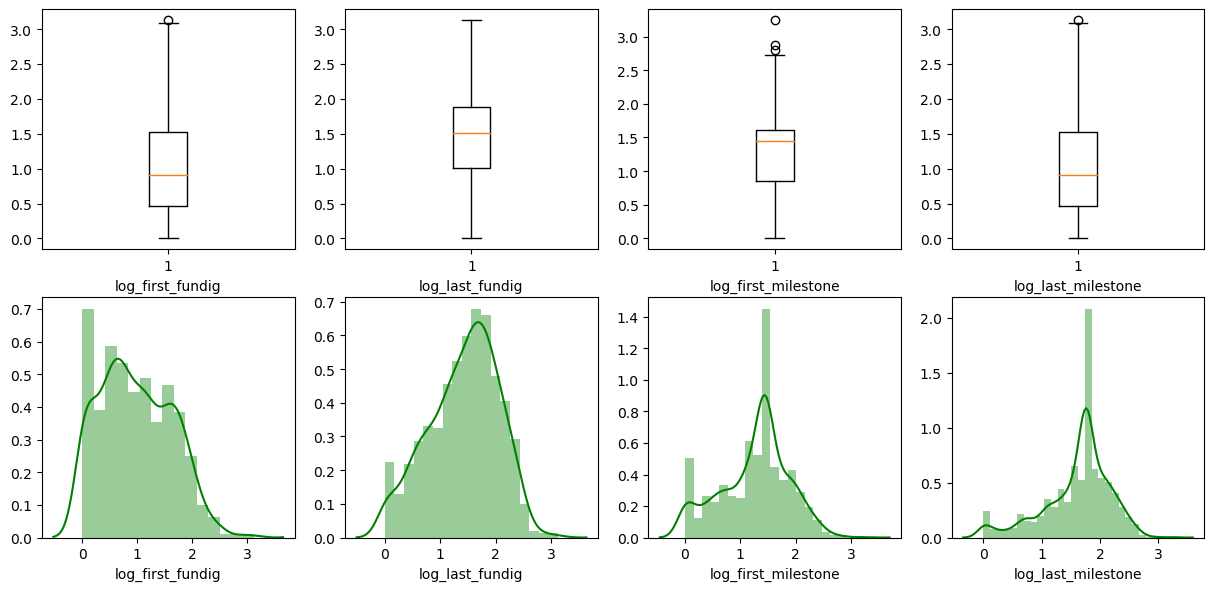

In [12]:
plt.figure(figsize=(15,7),dpi=100)

df_new["log_first_fundig"]=np.log(df_new["age_first_funding_year"]+1)
plt.subplot(2,4,1)
plt.xlabel("log_first_fundig")
plt.boxplot(df_new["log_first_fundig"])   

plt.subplot(2,4,5)
sns.distplot(df_new["log_first_fundig"] , color="green");


df_new["log_last_fundig"]=np.log(df_new["age_last_funding_year"]+1)
plt.subplot(2,4,2)
plt.xlabel("log_last_fundig")
plt.boxplot(df_new["log_last_fundig"])   

plt.subplot(2,4,6)
sns.distplot(df_new["log_last_fundig"], color="green")


df_new["log_first_milestone"]=np.log(df_new["age_first_milestone_year"]+1)
plt.subplot(2,4,3)
plt.xlabel("log_first_milestone")
plt.boxplot(df_new["log_first_milestone"])   

plt.subplot(2,4,7)
sns.distplot(df_new["log_first_milestone"], color="green")


df_new["log_last_milestone"]=np.log(df_new["age_last_milestone_year"]+1)
plt.subplot(2,4,4)
plt.xlabel("log_last_milestone")
plt.boxplot(df_new["log_first_fundig"])   

plt.subplot(2,4,8)
sns.distplot(df_new["log_last_milestone"], color="green");

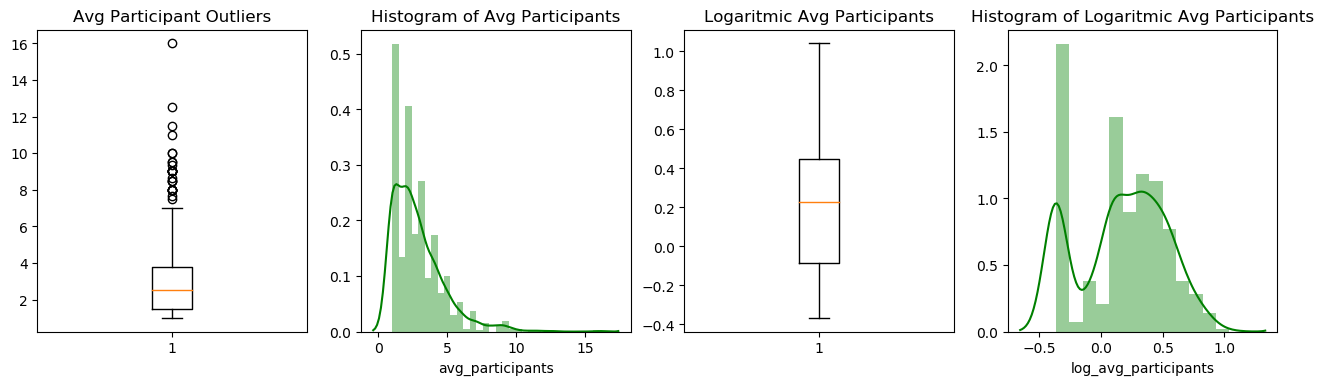

In [13]:
plt.figure(figsize=(16,4),dpi=100)


# "avg_participants"  column has negative value but it shouldn't be, so firstly we should get the absolute of the column
df_new["avg_participants"]=np.abs(df_new["avg_participants"])


plt.subplot(1,4,1)
plt.title("Avg Participant Outliers")
plt.boxplot(df_new["avg_participants"])

plt.subplot(1,4,2)
plt.title("Histogram of Avg Participants")
sns.distplot(df_new["avg_participants"], color="green")

plt.subplot(1,4,3)
df_new["log_avg_participants"]=np.log(df_new["avg_participants"]+1)
plt.title("Logaritmic Avg Participants")
plt.boxplot(np.log(df_new["log_avg_participants"]))

plt.subplot(1,4,4)
plt.title("Histogram of Logaritmic Avg Participants")
sns.distplot(np.log(df_new["log_avg_participants"]), color="green");

# After we get the logaritmic of "avg_participant" column, we get rid of the outliers but anyway this column still is not normal distribution

# Visualizing

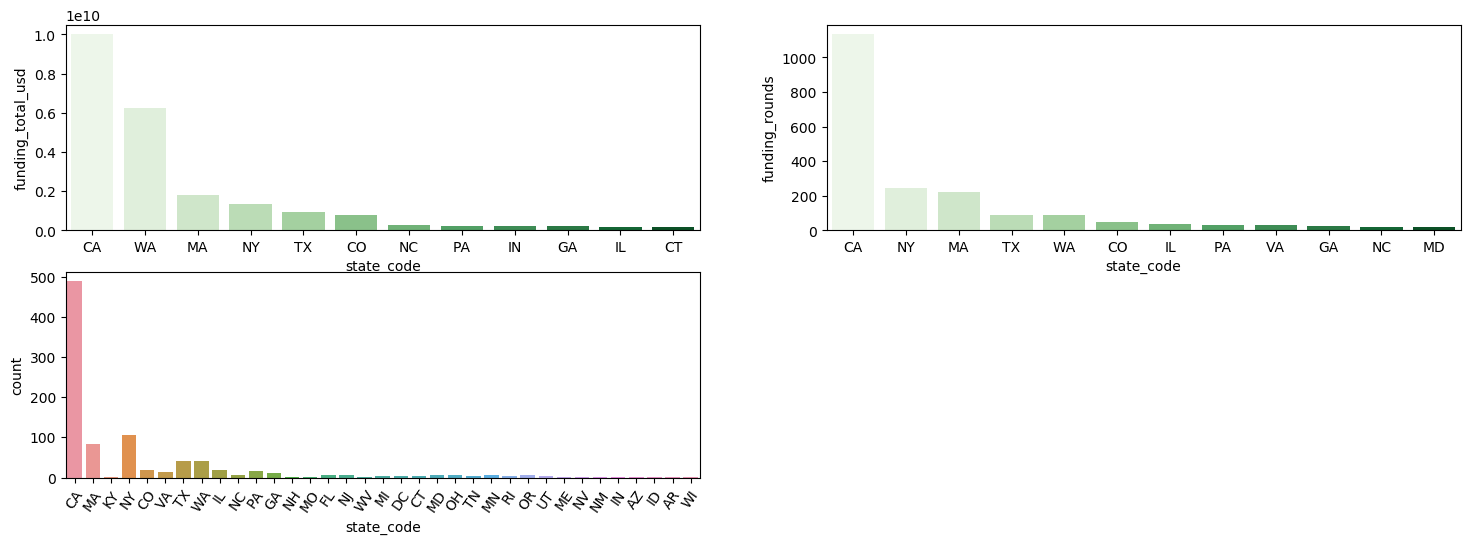

In [14]:
df_state=df_new.groupby(["state_code"])["funding_total_usd"].sum().sort_values(ascending=False).reset_index().head(12)
df_state
plt.figure(figsize=(18,6), dpi=100)
plt.subplot(2,2,1)
plt.ylabel("First 10 state")
plt.xlabel("Total USD of Funding")
sns.barplot(df_state["state_code"],df_state["funding_total_usd"], palette="Greens")


plt.subplot(2,2,2)
df_funding=df_new.groupby(["state_code"])["funding_rounds"].sum().sort_values(ascending=False).reset_index().head(12)
sns.barplot(df_funding["state_code"], df_funding["funding_rounds"], palette="Greens")

plt.subplot(2,2,3)
sns.countplot(df_new["state_code"])
plt.xticks(rotation=55);


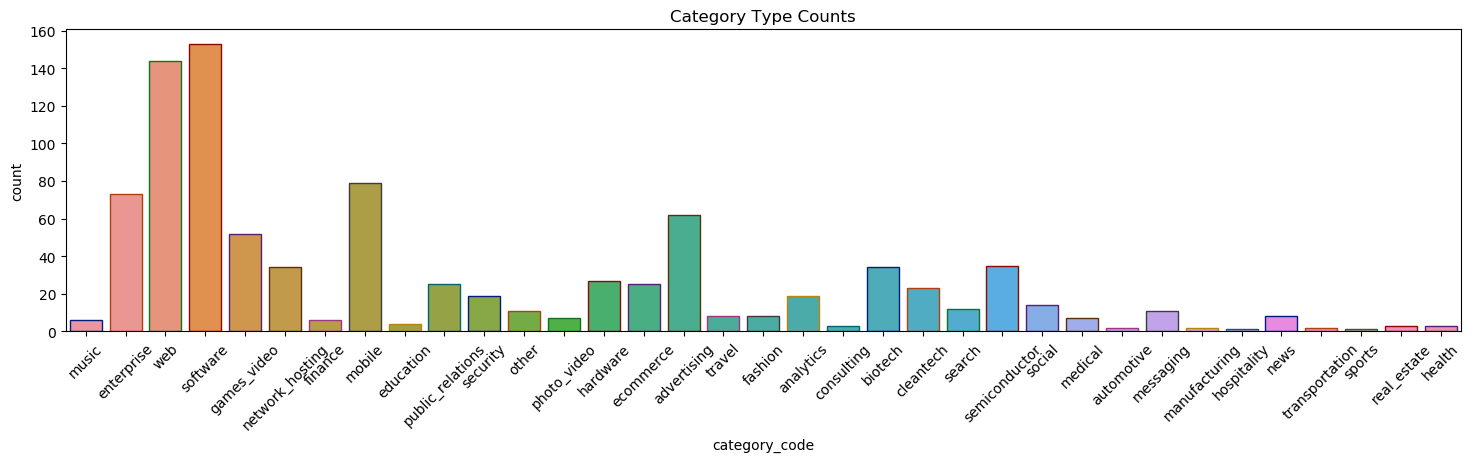

In [30]:
plt.figure(figsize=(18,4),dpi=100)
plt.xticks(rotation=45)
plt.title("Category Type Counts")
sns.countplot(df_new["category_code"], edgecolor=sns.color_palette("dark"));

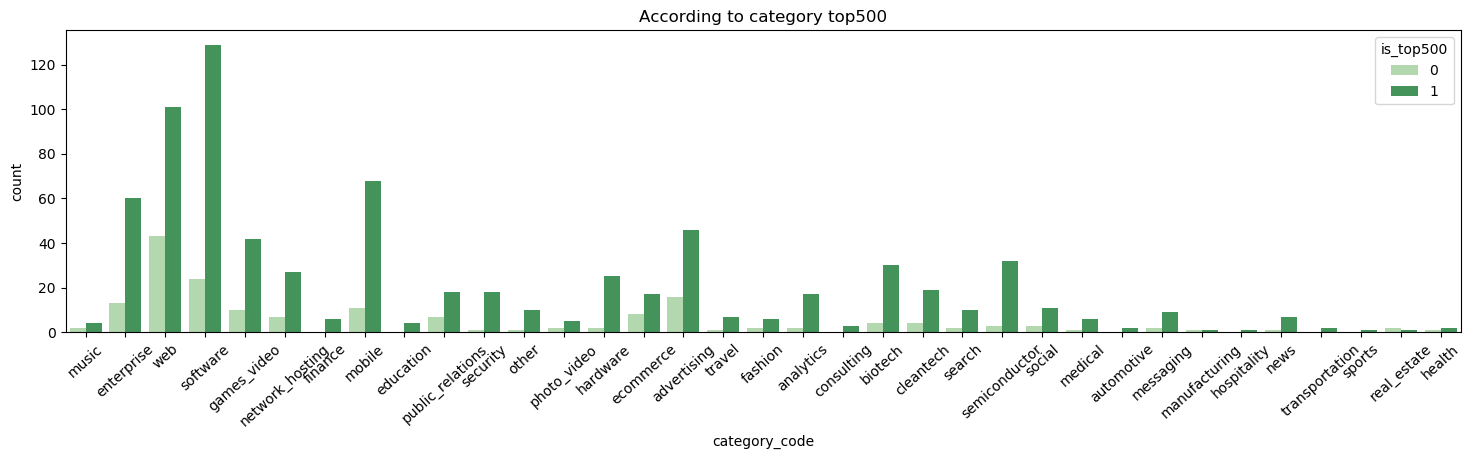

In [28]:
plt.figure(figsize=(18,4),dpi=100)

plt.xticks(rotation=42)
plt.title("According to category top500")
sns.countplot(x=df_new["category_code"], hue=df_new["is_top500"], palette="Greens");

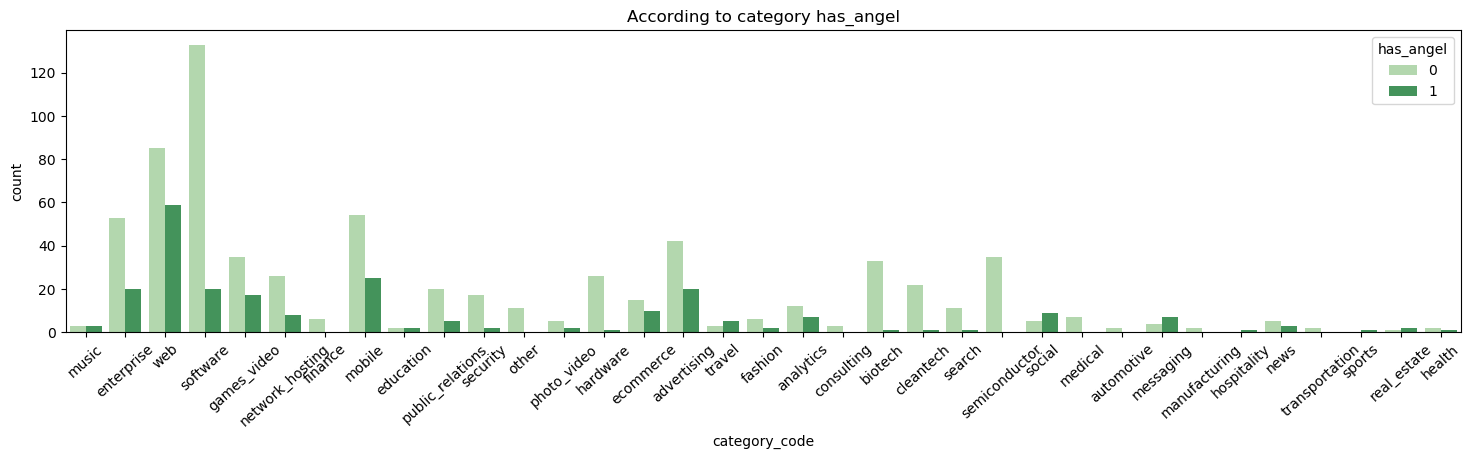

In [29]:
plt.figure(figsize=(18,4),dpi=100)

plt.xticks(rotation=42)
plt.title("According to category has_angel")
sns.countplot(x=df_new["category_code"], hue=df_new["has_angel"], palette="Greens");

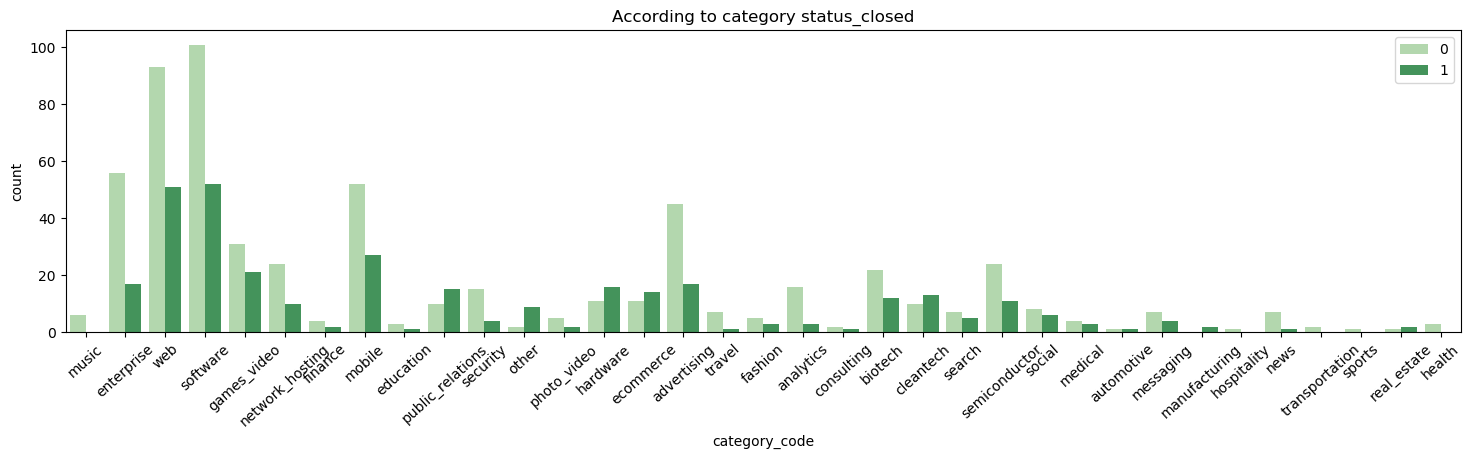

In [33]:
plt.figure(figsize=(18,4),dpi=100)

plt.xticks(rotation=42)
plt.title("According to category status_closed")
sns.countplot(x=df_new["category_code"], hue=df_new["status_closed"], palette="Greens")
plt.legend(loc=1);

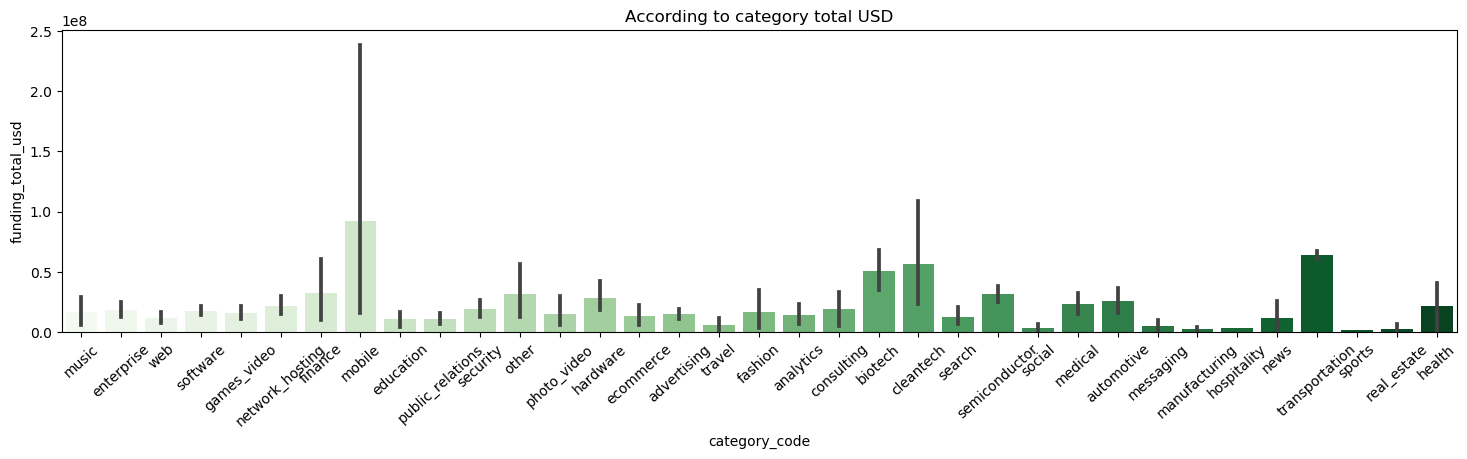

In [30]:
plt.figure(figsize=(18,4),dpi=100)

plt.xticks(rotation=42)
plt.title("According to category total USD")
sns.barplot(x=df_new["category_code"], y=df_new["funding_total_usd"], palette="Greens");

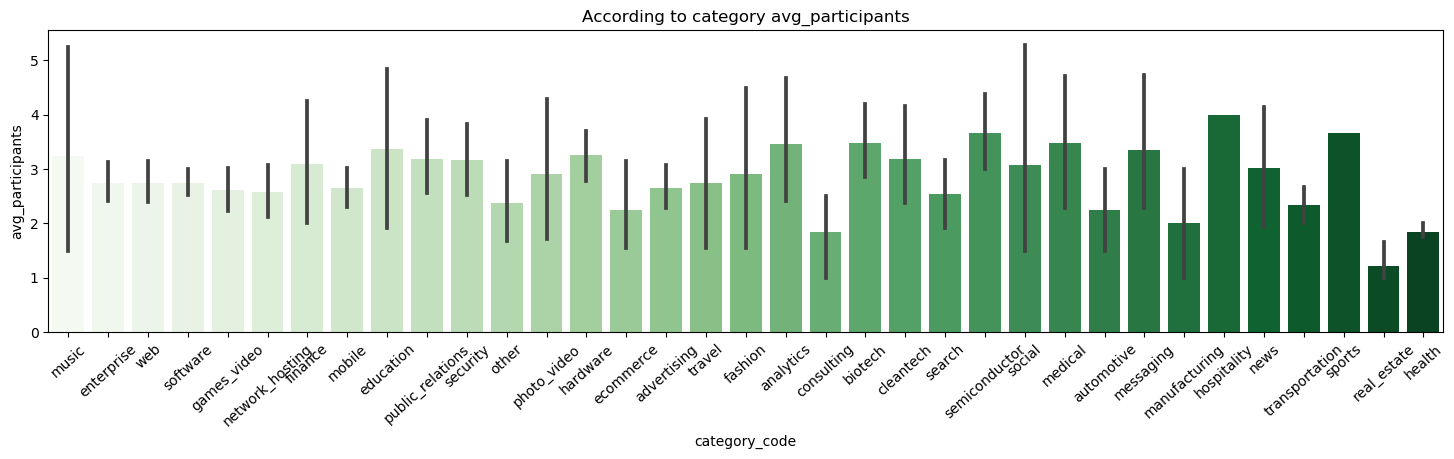

In [31]:
plt.figure(figsize=(18,4),dpi=100)

plt.xticks(rotation=42)
plt.title("According to category avg_participants")
sns.barplot(x=df_new["category_code"], y=df_new["avg_participants"], palette="Greens");

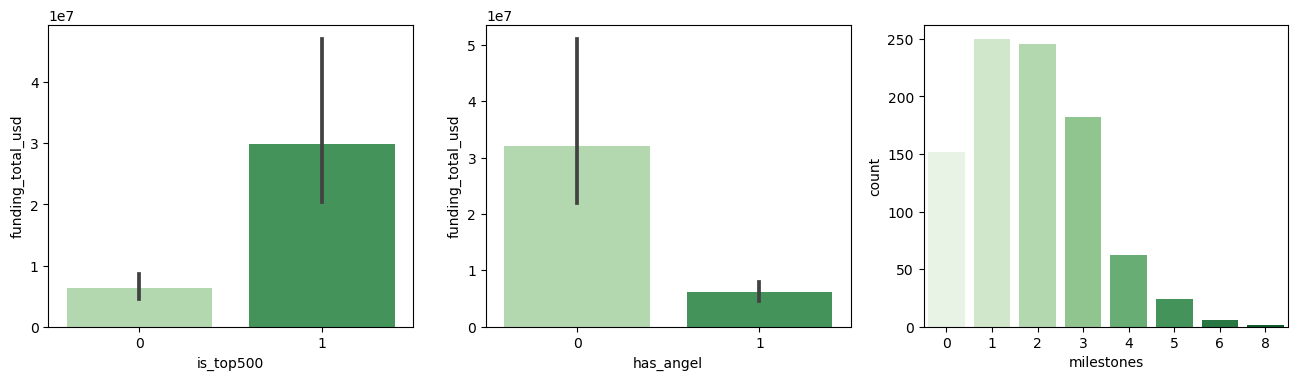

In [32]:
plt.figure(figsize=(16,4),dpi=100)

plt.subplot(1,3,1)
sns.barplot(df_new["is_top500"], df_new["funding_total_usd"], palette="Greens")

plt.subplot(1,3,2)
sns.barplot(df_new["has_angel"], df_new["funding_total_usd"], palette="Greens")

plt.subplot(1,3,3)
sns.countplot(df_new.milestones, palette="Greens");

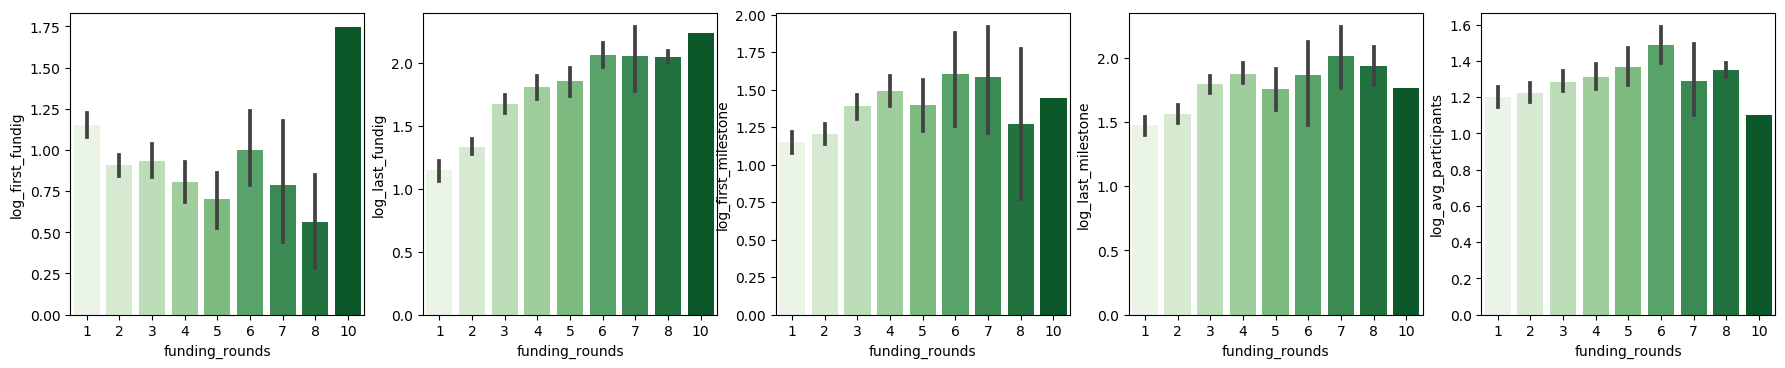

In [27]:
plt.figure(figsize=(22,4),dpi=100)


col=["log_first_fundig","log_last_fundig","log_first_milestone","log_last_milestone","log_avg_participants"]


for i in range(len(col)):
    plt.subplot(1,5,i+1)
    sns.barplot(df_new["funding_rounds"],df_new[col[i]], palette="Greens");


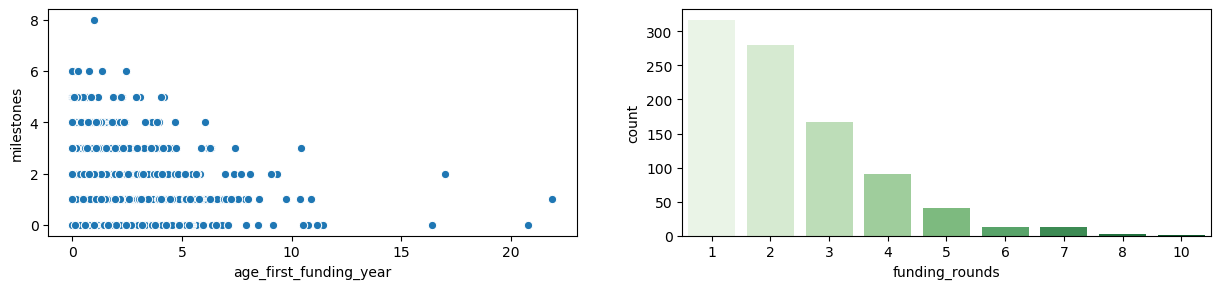

In [28]:
plt.figure(figsize=(15,3),dpi=100)

plt.subplot(1,2,1)
sns.scatterplot(df_new["age_first_funding_year"], df_new["milestones"], palette="Greens")

plt.subplot(1,2,2)
sns.countplot(df_new["funding_rounds"], palette="Greens");

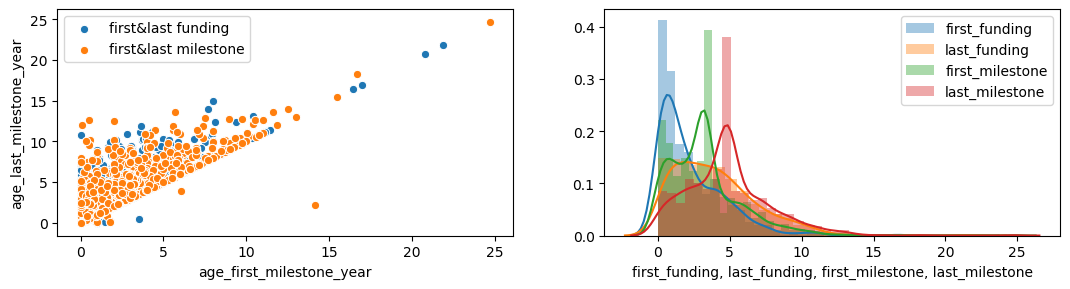

In [22]:
plt.figure(figsize=(20,3),dpi=100)
plt.subplot(1,3,1)
sns.scatterplot(df_new["age_first_funding_year"],df_new["age_last_funding_year"], label="first&last funding", palette="Greens")
sns.scatterplot(df_new["age_first_milestone_year"], df_new["age_last_milestone_year"], label="first&last milestone", palette="Blues")
plt.legend()

plt.subplot(1,3,2)
sns.distplot(df_new["age_first_funding_year"], label="first_funding")
sns.distplot(df_new["age_last_funding_year"], label="last_funding")
sns.distplot(df_new["age_first_milestone_year"], label="first_milestone")
sns.distplot(df_new["age_last_milestone_year"], label="last_milestone")
plt.xlabel("first_funding, last_funding, first_milestone, last_milestone")
plt.legend()


plt.show()

In [261]:
df_new.head(2)

,state_code,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_angel,avg_participants,is_top500,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_roundA,has_roundB,has_roundC,has_roundD,log_avg_participants,log_first_fundig,log_last_fundig,log_first_milestone,log_last_milestone,norm_log_first_funding,norm_log_last_funding,norm_log_first_milestone,norm_log_last_milestone,norm_log_avg_participants,status_closed
0,CA,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,1,1.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.693147,1.178440,1.386969,1.734925,2.041753,0.033093,0.029383,0.040581,0.039083,0.017296,0
1,CA,Los Gatos,TriCipher,1,2000-01-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,0,4.75,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1.749200,1.812542,2.397650,2.080129,2.080129,0.050900,0.050794,0.048655,0.039818,0.043647,0


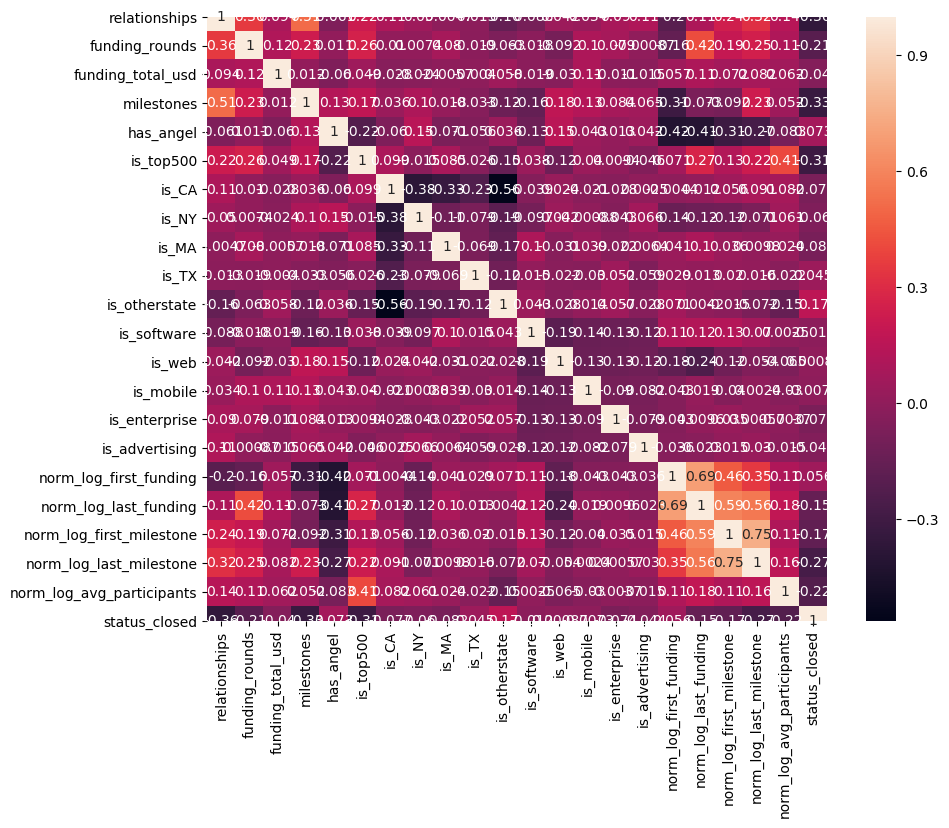

In [267]:
plt.figure(figsize=(10,8),dpi=100)

sns.heatmap(df_new[["relationships","funding_rounds","funding_total_usd","milestones","has_angel","is_top500","is_CA","is_NY","is_MA","is_TX","is_otherstate","is_software",
                         "is_web","is_mobile","is_enterprise","is_advertising","norm_log_first_funding","norm_log_last_funding","norm_log_first_milestone","norm_log_last_milestone",
                         "norm_log_avg_participants","status_closed"]].corr(), annot=True);

### Test it statistically

In [23]:
from scipy.stats import ttest_ind

# we get the null hypothesis that both groups have equal means.

ttest=ttest_ind(df_new["has_angel"],df_new["funding_total_usd"])
print("Is there any differences between means of has_angel and funding_total_usd?")
print("--"*40)
print("t statistic: {:3f} p_value: {:3f}". format(ttest[0],ttest[1]),"\n","\n")


print("Is there any differences between means of is_top500 and funding_total_usd?")
print("--"*40)
ttest2=ttest_ind(df_new["is_top500"],df_new["funding_total_usd"])
print("t statistic: {:3f} p_value: {:3f}". format(ttest2[0],ttest2[1]))


# In order to p_value is less than 0.05, we reject the H0 hypothesis so, there is not differences between mean of variables

Is there any differences between means of has_angel and funding_total_usd?
--------------------------------------------------------------------------------
t statistic: -4.072443 p_value: 0.000048 
 

Is there any differences between means of is_top500 and funding_total_usd?
--------------------------------------------------------------------------------
t statistic: -4.072443 p_value: 0.000048


In [24]:
# Test whether group differences are significant.


ttest_3=ttest_ind(df_new["funding_rounds"], df_new["log_first_fundig"])    
print("'funding_rounds' and 'log_first_fundig' t statistic: {:.4f}, p_value: {:.4f}". format(ttest_3[0], ttest_3[1]))
   
    
ttest_4=ttest_ind(df_new["funding_rounds"], df_new["log_last_fundig"])    
print("'funding_rounds' and 'log_last_fundig' t statistic: {:.4f}, p_value: {:.4f}". format(ttest_4[0], ttest_4[1]))

ttest_5=ttest_ind(df_new["funding_rounds"], df_new["log_first_milestone"])    
print("'funding_rounds' and 'log_first_milestone' t statistic: {:.4f}, p_value: {:.4f}". format(ttest_5[0], ttest_5[1]))

ttest_6=ttest_ind(df_new["funding_rounds"], df_new["log_last_milestone"])    
print("'funding_rounds' and 'log_last_milestone' t statistic: {:.4f}, p_value: {:.4f}". format(ttest_6[0], ttest_6[1]))

ttest_7=ttest_ind(df_new["funding_rounds"], df_new["log_avg_participants"])    
print("'funding_rounds' and 'log_avg_participants' t statistic: {:.4f}, p_value: {:.4f}". format(ttest_7[0], ttest_7[1]))

# In order to p_value is less than 0.05, rejected H0 hypothesis so, there is not difference between means

'funding_rounds' and 'log_first_fundig' t statistic: 26.4139, p_value: 0.0000
'funding_rounds' and 'log_last_fundig' t statistic: 17.7002, p_value: 0.0000
'funding_rounds' and 'log_first_milestone' t statistic: 20.8776, p_value: 0.0000
'funding_rounds' and 'log_last_milestone' t statistic: 13.9060, p_value: 0.0000
'funding_rounds' and 'log_avg_participants' t statistic: 22.2050, p_value: 0.0000


In [31]:
df_new.head(2)

,state_code,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_angel,avg_participants,is_top500,status_closed,log_first_fundig,log_last_fundig,log_first_milestone,log_last_milestone,log_avg_participants
0,CA,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,1,1.00,0,0,1.178440,1.386969,1.734925,2.041753,0.693147
1,CA,Los Gatos,TriCipher,1,2000-01-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,0,4.75,1,0,1.812542,2.397650,2.080129,2.080129,1.749200


In [32]:
df.head(2)

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.00,0,acquired
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.75,1,acquired


## Now, create clean dataset including the other columns

In [15]:
df_new["is_CA"]=df.is_CA
df_new["is_NY"]=df.is_NY
df_new["is_MA"]=df.is_MA
df_new["is_TX"]=df.is_TX
df_new["is_otherstate"]=df.is_otherstate
df_new["is_software"]=df.is_software
df_new["is_web"]=df.is_web
df_new["is_mobile"]=df.is_mobile
df_new["is_enterprise"]=df.is_enterprise
df_new["is_advertising"]=df.is_advertising
df_new["is_gamesvideo"]=df.is_gamesvideo
df_new["is_ecommerce"]=df.is_ecommerce
df_new["is_biotech"]=df.is_biotech
df_new["is_consulting"]=df.is_consulting
df_new["is_othercategory"]=df.is_othercategory
df_new["has_VC"]=df.has_VC
df_new["has_roundA"]=df.has_roundA
df_new["has_roundB"]=df.has_roundB
df_new["has_roundC"]=df.has_roundC
df_new["has_roundD"]=df.has_roundD

In [16]:
# Now, we have created clean dataframe including necessary columns for prediction

display(df_new.head(2))
print(df_new.shape)

,state_code,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_angel,avg_participants,is_top500,status_closed,log_first_fundig,log_last_fundig,log_first_milestone,log_last_milestone,log_avg_participants,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_roundA,has_roundB,has_roundC,has_roundD
0,CA,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,1,1.00,0,0,1.178440,1.386969,1.734925,2.041753,0.693147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,CA,Los Gatos,TriCipher,1,2000-01-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,0,4.75,1,0,1.812542,2.397650,2.080129,2.080129,1.749200,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1


(923, 45)


# Slowly, Start to Machine Learning Algorithms

In [27]:
pd.options.display.max_rows
pd.set_option("display.max_rows",None)

df_new.corr().unstack().sort_values().drop_duplicates().head()


status_closed  labels             -1.000000
is_otherstate  is_CA              -0.562953
has_angel      log_first_fundig   -0.416753
               log_last_fundig    -0.405765
is_NY          is_CA              -0.380683
dtype: float64

In [17]:
df_new.select_dtypes(exclude="O").head(2)

,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_angel,avg_participants,is_top500,status_closed,log_first_fundig,log_last_fundig,log_first_milestone,log_last_milestone,log_avg_participants,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_roundA,has_roundB,has_roundC,has_roundD
0,1,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,1.00,0,0,1.178440,1.386969,1.734925,2.041753,0.693147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,2000-01-01,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0,4.75,1,0,1.812542,2.397650,2.080129,2.080129,1.749200,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1


## Before the feature selection, we have to normalize the some columns

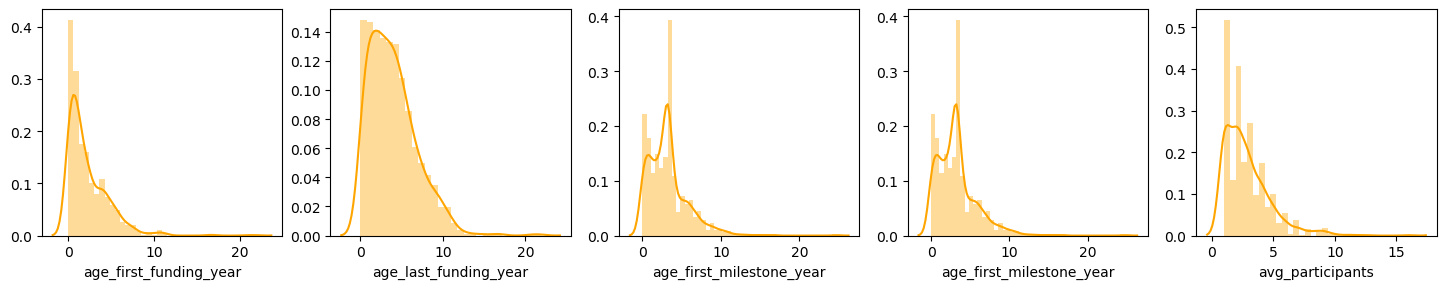

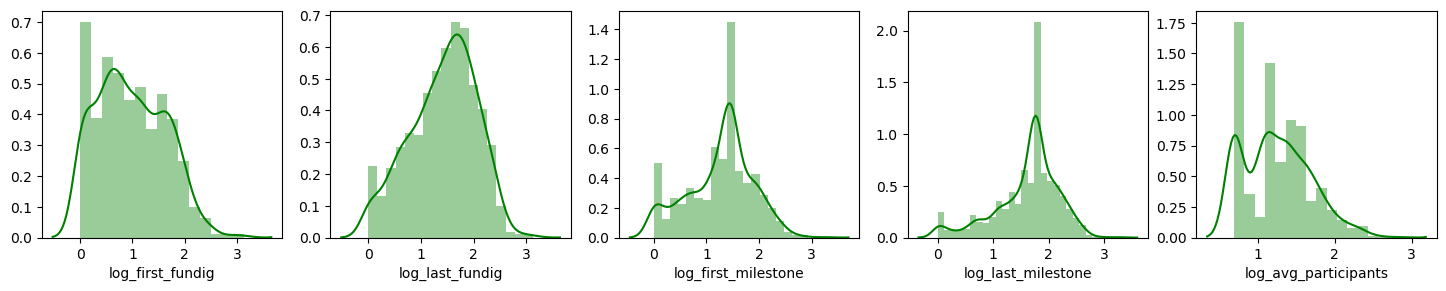

In [29]:
column=["log_first_fundig","log_last_fundig","log_first_milestone","log_last_milestone","log_avg_participants"]
colu=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_first_milestone_year","avg_participants"]

plt.figure(figsize=(18,3), dpi=100)
for j in range(len(colu)):
    plt.subplot(1,5,j+1)
    sns.distplot(df_new[colu[j]], color="orange")
    
plt.figure(figsize=(18,3), dpi=100)
for i in range(len(column)):
    plt.subplot(1,5,i+1)
    sns.distplot(df_new[column[i]], color="green");

### Are these variables really normal distribution, calculate it statistically?

In [30]:
# Test it, whether these variables are normal distribution, for this i will use jarque-bera test function 

from scipy.stats import jarque_bera

dist=["log_first_fundig", "log_last_fundig", "log_first_milestone", "log_last_milestone", "log_avg_participants"]
jarq_df=pd.DataFrame(columns=["variable","test statistic","p_value"])


for d in range(len(dist)):
    jarq=jarque_bera(df_new[dist[d]])
    jarq_df=jarq_df.append({"variable":dist[d],
                   "test statistic":jarq[0],
                   "p_value":jarq[1]}, ignore_index=True)

display(jarq_df)    


# All of the variables are not the normal distribution because of rejected the H0 hypothesis.

,variable,test statistic,p_value
0,log_first_fundig,32.522199,8.667508e-08
1,log_last_fundig,26.726376,1.571959e-06
2,log_first_milestone,20.060902,4.403829e-05
3,log_last_milestone,150.065334,0.000000e+00
4,log_avg_participants,35.013315,2.494338e-08


In [18]:
from sklearn.preprocessing import normalize

df_new["norm_log_first_funding"]=normalize(np.array(df_new["log_first_fundig"]).reshape(1,-1)).reshape(-1,1)
df_new["norm_log_last_funding"]=normalize(np.array(df_new["log_last_fundig"]).reshape(1,-1)).reshape(-1,1)
df_new["norm_log_first_milestone"]=normalize(np.array(df_new["log_first_milestone"]).reshape(1,-1)).reshape(-1,1)
df_new["norm_log_last_milestone"]=normalize(np.array(df_new["log_last_milestone"]).reshape(1,-1)).reshape(-1,1)
df_new["norm_log_avg_participants"]=normalize(np.array(df_new["log_avg_participants"]).reshape(1,-1)).reshape(-1,1)

Minimum values is norm_log_first_funding 0.0
Minimum values is norm_log_first_funding 0.08792383399068528


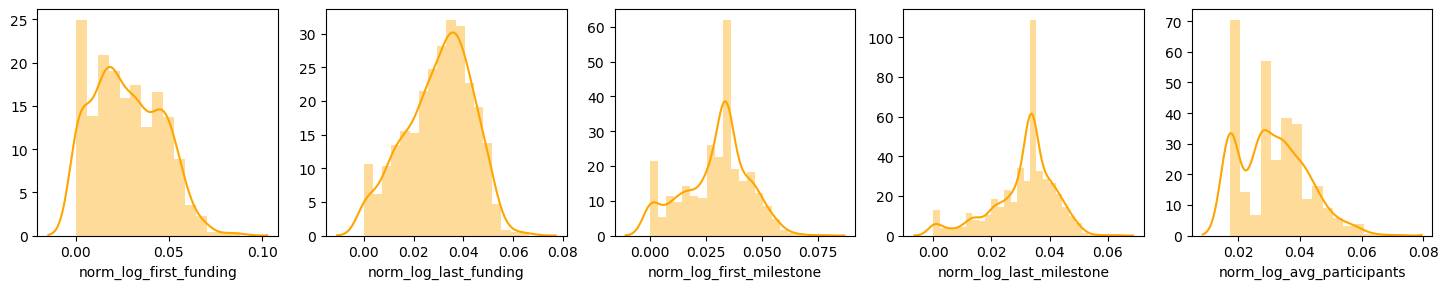

In [32]:
column2=["norm_log_first_funding","norm_log_last_funding","norm_log_first_milestone","norm_log_last_milestone","norm_log_avg_participants"]

plt.figure(figsize=(18,3), dpi=100)
for i in range(len(column2)):
    plt.subplot(1,5,i+1)
    sns.distplot(df_new[column2[i]], color="orange");
    
print("Minimum values is norm_log_first_funding", df_new["norm_log_first_funding"].min())
print("Minimum values is norm_log_first_funding", df_new["norm_log_first_funding"].max())   
# Still these columns are not normal distribution

In [19]:
# Let's now, try StandardScaler()

from sklearn.preprocessing import scale

df_new["scaled_log_first_funding"]=scale(df_new["log_first_fundig"])
df_new["scaled_log_last_funding"]=scale(df_new["log_last_fundig"])
df_new["scaled_log_first_milestone"]=scale(df_new["log_first_milestone"])
df_new["scaled_log_last_milestone"]=scale(df_new["log_last_milestone"])
df_new["scaled_log_avg_participants"]=scale(df_new["log_avg_participants"])

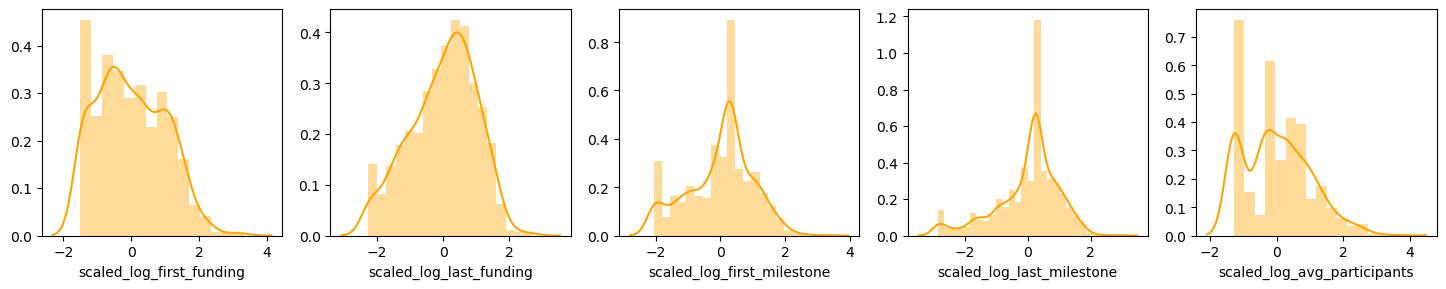

In [34]:
column3=["scaled_log_first_funding","scaled_log_last_funding","scaled_log_first_milestone","scaled_log_last_milestone","scaled_log_avg_participants"]

plt.figure(figsize=(18,3), dpi=100)
for i in range(len(column3)):
    plt.subplot(1,5,i+1)
    sns.distplot(df_new[column3[i]], color="orange");

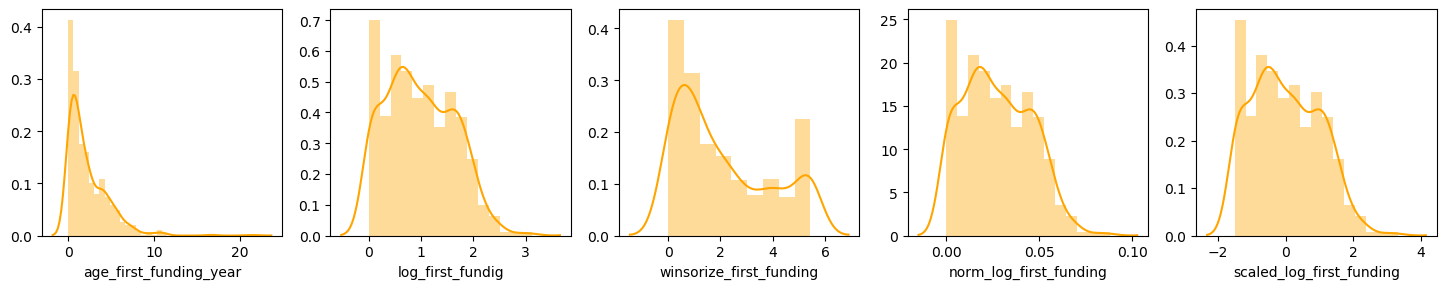

In [20]:
from scipy.stats.mstats import winsorize

df_new["winsorize_first_funding"]=winsorize(df_new["age_first_funding_year"], (0,0.10))

# For "age_first_funding" column we analyze whether there are normal distribution

column4=["age_first_funding_year","log_first_fundig","winsorize_first_funding","norm_log_first_funding","scaled_log_first_funding"]

plt.figure(figsize=(18,3),dpi=100)

for i in range(len(column4)):
    plt.subplot(1,5,i+1)
    sns.distplot(df_new[column4[i]], color="orange");    

# None of this columns are not normal distribution but we need to select column closer to normal distribution and these are logaritmic columns.
# So we will decide to continue with only logaritmic columns in this dataset

In [21]:
df_new.drop(["winsorize_first_funding","scaled_log_avg_participants","scaled_log_last_milestone","scaled_log_first_milestone","scaled_log_last_funding","scaled_log_first_funding"],
             axis=1, inplace=True)

In [22]:
# Target variable must be in the end

cols = [col for col in df_new if col != 'status_closed'] + ['status_closed'] 
df_new=df_new[cols]
df_new.head(1)

,state_code,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_angel,avg_participants,is_top500,log_first_fundig,log_last_fundig,log_first_milestone,log_last_milestone,log_avg_participants,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_roundA,has_roundB,has_roundC,has_roundD,norm_log_first_funding,norm_log_last_funding,norm_log_first_milestone,norm_log_last_milestone,norm_log_avg_participants,status_closed
0,CA,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,1,1.0,0,1.17844,1.386969,1.734925,2.041753,0.693147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.033093,0.029383,0.040581,0.039083,0.017296,0


## Features and Target Variable

In [23]:
X=df_new.select_dtypes(exclude="O").drop(["labels","founded_at","first_funding_at","last_funding_at","age_first_funding_year","age_last_funding_year","age_first_milestone_year",
                                          "age_last_milestone_year","avg_participants","log_first_fundig","log_last_fundig","log_first_milestone","log_last_milestone",
                                          "log_avg_participants","status_closed"], axis=1)

Y=df_new["status_closed"]

In [24]:
# We have 36 columns but these are too much, we need to decrease them.
print(len(X.columns))
display(X.head(2))

31


,relationships,funding_rounds,funding_total_usd,milestones,has_angel,is_top500,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_roundA,has_roundB,has_roundC,has_roundD,norm_log_first_funding,norm_log_last_funding,norm_log_first_milestone,norm_log_last_milestone,norm_log_avg_participants
0,3,3,375000,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.033093,0.029383,0.040581,0.039083,0.017296
1,9,4,40100000,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0.050900,0.050794,0.048655,0.039818,0.043647


#### Is target variable imbalanced data?

Rate of the 0 in 'status_closed' column: % 64.680
Rate of the 1 in 'status_closed' column: % 35.320


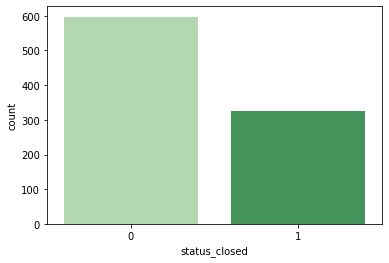

In [40]:
print("Rate of the 0 in 'status_closed' column: % {:.3f}". format(len(df_new[df_new["status_closed"]==0])/len(df_new["status_closed"])*100))
print("Rate of the 1 in 'status_closed' column: % {:.3f}". format(len(df_new[df_new["status_closed"]==1])/len(df_new["status_closed"])*100))

sns.countplot(df_new.status_closed, palette="Greens");

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=42)

In [43]:
df_new.head(1)

,state_code,city,name,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_angel,avg_participants,is_top500,log_first_fundig,log_last_fundig,log_first_milestone,log_last_milestone,log_avg_participants,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_roundA,has_roundB,has_roundC,has_roundD,norm_log_first_funding,norm_log_last_funding,norm_log_first_milestone,norm_log_last_milestone,norm_log_avg_participants,status_closed
0,CA,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,1,1.0,0,1.17844,1.386969,1.734925,2.041753,0.693147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.033093,0.029383,0.040581,0.039083,0.017296,0


## Logistic Regression

In [26]:
# Before SMOTE:

Y=df_new["status_closed"]
X=df_new[["relationships","funding_rounds","funding_total_usd","milestones","has_angel","is_top500","is_CA","is_NY","is_MA","is_TX","is_otherstate","is_software","is_web","is_mobile",
        "is_enterprise","is_advertising","is_gamesvideo","is_ecommerce","is_consulting","is_othercategory","norm_log_first_funding","norm_log_last_funding","norm_log_first_milestone",
        "norm_log_last_milestone","norm_log_avg_participants"]]


X=StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=42)

log=LogisticRegression()
log.fit(X_train,Y_train)

y_test_pred=log.predict(X_test)
y_train_pred=log.predict(X_train)

print("Accuracy of Y_test is: {:.3f}". format(accuracy_score(y_test_pred,Y_test)))
print("Accuracy of Y_train is: {:.3f}". format(accuracy_score(y_train_pred,Y_train),"\n","\n"))
print("Test set confusion Matrix","\n", confusion_matrix(Y_test,y_test_pred))
print("Train set confusion Matrix","\n", confusion_matrix(Y_train,y_train_pred),"\n","\n")
print("Test set classification report","\n", classification_report(Y_test,y_test_pred))
print("Length of 0 in Y_train: %{:.3f}". format(len(Y_train[Y_train==0])/(len(Y_train))*100))
print("Length of 1 in Y_train: %{:.3f}".format(len(Y_train[Y_train==1])/(len(Y_train))*100,"\n"))
print("Length of 0 in Y_test: %{:.3f}".format(len(Y_test[Y_test==0])/(len(Y_test))*100))
print("Length of 1 in Y_test: %{:.3f}".format(len(Y_test[Y_test==1])/(len(Y_test))*100,"\n"))

# In order to test set is higher than the train set, we can say that there is an overfit

Accuracy of Y_test is: 0.751
Accuracy of Y_train is: 0.767
Test set confusion Matrix 
 [[99 13]
 [33 40]]
Train set confusion Matrix 
 [[423  62]
 [110 143]] 
 

Test set classification report 
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       112
           1       0.75      0.55      0.63        73

    accuracy                           0.75       185
   macro avg       0.75      0.72      0.72       185
weighted avg       0.75      0.75      0.74       185

Length of 0 in Y_train: %65.718
Length of 1 in Y_train: %34.282
Length of 0 in Y_test: %60.541
Length of 1 in Y_test: %39.459


In [45]:
from sklearn.model_selection import GridSearchCV

params= {"C": [10**x for x in range(-4,4,1)],
            "penalty": ["l1", "l2"]}

grid=GridSearchCV(estimator=log,
                  param_grid=params,
                  cv=10,
                  return_train_score=True)

grid.fit(X_train,Y_train)
print("Best parameters:", grid.best_params_)
print("Best scores: {:.4f}".format(grid.best_score_))

Best parameters: {'C': 0.01, 'penalty': 'l2'}
Best scores: 0.7306


In [49]:
# After SMOTE algorithm, either Accuracy of Y_test or F1 score decreases, so i will continue without SMOTE

from imblearn.over_sampling import SMOTE,ADASYN

Y=df_new["status_closed"]
X=df_new[["relationships","funding_rounds","funding_total_usd","milestones","has_angel","is_top500","is_CA","is_NY","is_MA","is_TX","is_otherstate","is_software","is_web","is_mobile",
        "is_enterprise","is_advertising","is_gamesvideo","is_ecommerce","is_consulting","is_othercategory","norm_log_first_funding","norm_log_last_funding","norm_log_first_milestone",
        "norm_log_last_milestone","norm_log_avg_participants"]]

sm=SMOTE(random_state=27, sampling_strategy=1)

X_smote, Y_smote=sm.fit_sample(X,Y)


X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote,Y_smote,test_size=0.20,random_state=42)

log.fit(X_train_smote,Y_train_smote)
y_test_smote_pred=log.predict(X_test_smote)
y_train_smote_pred=log.predict(X_train_smote)

print("Accuracy of Y_test is: {:.3f}". format(accuracy_score(y_test_smote_pred,Y_test_smote)),"\n")
print("Confusion Matrix", confusion_matrix(Y_test_smote,y_test_smote_pred))
print("Confusion Matrix", confusion_matrix(Y_train_smote,y_train_smote_pred),"\n")
print("Classification report", classification_report(Y_test_smote,y_test_smote_pred),"\n")
print(len(Y_train_smote[Y_train_smote==0])/(len(Y_train_smote))*100)
print(len(Y_train_smote[Y_train_smote==1])/(len(Y_train_smote))*100,"\n")

Accuracy of Y_test is: 0.548 

Confusion Matrix [[131   0]
 [108   0]]
Confusion Matrix [[466   0]
 [489   0]] 

Classification report               precision    recall  f1-score   support

           0       0.55      1.00      0.71       131
           1       0.00      0.00      0.00       108

    accuracy                           0.55       239
   macro avg       0.27      0.50      0.35       239
weighted avg       0.30      0.55      0.39       239
 

48.795811518324605
51.204188481675395 



After smote algorithm was used, accuracy of the model decreased so, i will continue without smote algorithm

### For Feature Selection, Apply the PCA

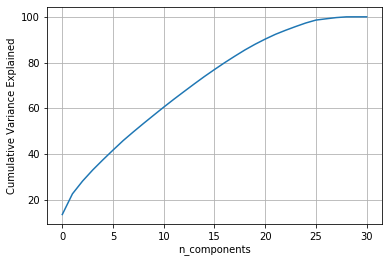

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


X=df_new.select_dtypes(exclude="O").drop(["labels","founded_at","first_funding_at","last_funding_at","age_first_funding_year","age_last_funding_year","age_first_milestone_year",
                                          "age_last_milestone_year","avg_participants","log_first_fundig","log_last_fundig","log_first_milestone","log_last_milestone",
                                          "log_avg_participants","status_closed"], axis=1)
Y=df_new["status_closed"]


# z score for the features
X=StandardScaler().fit_transform(X)

pca = PCA(n_components=31)
X_new=pca.fit_transform(X)
exp_var=pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)

plt.plot(cumsum_var)
plt.xlabel("n_components")
plt.ylabel("Cumulative Variance Explained")
plt.grid()

# First 15-20 columns are enough for prediction because of they explain %80 of variance

In [30]:
X_new_train, X_new_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.20, random_state=42)

log_reg=LogisticRegression()
log_reg.fit(X_new_train,Y_train)
y_pred_new=log_reg.predict(X_new_test)
y_pred_train_new=log_reg.predict(X_new_train)

print("Accuracy of the test with X_new: ", accuracy_score(Y_test,y_pred_new))
print("Accuracy of the train with X_new: ", accuracy_score(Y_train,y_pred_train_new))
print("Classification problem:", classification_report(Y_test,y_pred_new))

Accuracy of the test with X_new:  0.7567567567567568
Accuracy of the train with X_new:  0.7615176151761518
Classification problem:               precision    recall  f1-score   support

           0       0.75      0.90      0.82       112
           1       0.78      0.53      0.63        73

    accuracy                           0.76       185
   macro avg       0.76      0.72      0.73       185
weighted avg       0.76      0.76      0.75       185



In [31]:
# Accuracy of random forest algorithm with PCA is lower.


from sklearn.ensemble import RandomForestClassifier

forest_new=RandomForestClassifier(n_estimators=100, max_depth=7)

forest_new.fit(X_new_train,Y_train)

forest_test_pred=forest_new.predict(X_new_test)
forest_train_pred=forest_new.predict(X_new_train)

print("Accuracy of the random forest with new:", accuracy_score(Y_test,forest_test_pred))
print("Accuracy of the random forest with new:", accuracy_score(Y_train,forest_train_pred))
print("Classification report random forest:", classification_report(Y_test,forest_test_pred))

Accuracy of the random forest with new: 0.7135135135135136
Accuracy of the random forest with new: 0.9132791327913279
Classification report random forest:               precision    recall  f1-score   support

           0       0.69      0.95      0.80       112
           1       0.81      0.36      0.50        73

    accuracy                           0.71       185
   macro avg       0.75      0.65      0.65       185
weighted avg       0.74      0.71      0.68       185



In [244]:
# To find the most effective features, we can apply 4 method: PCA, PolynomialFeatures, RFE, "RandomForest / Feature_importance". 
# Random forest algorithm can be used after apply the regression or classification problem but we need to find the most effective features before apply the machine learning algorithms,so 
# in order, we can apply to 3 method

from sklearn.preprocessing import PolynomialFeatures



X=df_new.select_dtypes(exclude="O").drop(["labels","founded_at","first_funding_at","last_funding_at","age_first_funding_year","age_last_funding_year","age_first_milestone_year",
                                          "age_last_milestone_year","avg_participants","log_first_fundig","log_last_fundig","log_first_milestone","log_last_milestone",
                                          "log_avg_participants","status_closed"], axis=1)
Y=df_new["status_closed"]

pf=PolynomialFeatures(degree=2)
pf.fit(X.head())

X_pf=pf.transform(X.head())
X_pf_df=pd.DataFrame(X_pf, columns=pf.get_feature_names(X.columns))
display(X_pf_df.head(2))
print(len(X_pf_df.columns))

,1,relationships,funding_rounds,funding_total_usd,milestones,has_angel,is_top500,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_roundA,has_roundB,has_roundC,has_roundD,norm_log_first_funding,norm_log_last_funding,norm_log_first_milestone,norm_log_last_milestone,norm_log_avg_participants,relationships^2,relationships funding_rounds,relationships funding_total_usd,relationships milestones,relationships has_angel,relationships is_top500,relationships is_CA,relationships is_NY,relationships is_MA,relationships is_TX,relationships is_otherstate,relationships is_software,relationships is_web,relationships is_mobile,relationships is_enterprise,relationships is_advertising,relationships is_gamesvideo,relationships is_ecommerce,relationships is_biotech,relationships is_consulting,relationships is_othercategory,relationships has_VC,relationships has_roundA,relationships has_roundB,relationships has_roundC,relationships has_roundD,relationships norm_log_first_funding,relationships norm_log_last_funding,relationships norm_log_first_milestone,relationships norm_log_last_milestone,relationships norm_log_avg_participants,funding_rounds^2,funding_rounds funding_total_usd,funding_rounds milestones,funding_rounds has_angel,funding_rounds is_top500,funding_rounds is_CA,funding_rounds is_NY,funding_rounds is_MA,funding_rounds is_TX,funding_rounds is_otherstate,funding_rounds is_software,funding_rounds is_web,funding_rounds is_mobile,funding_rounds is_enterprise,funding_rounds is_advertising,funding_rounds is_gamesvideo,funding_rounds is_ecommerce,funding_rounds is_biotech,funding_rounds is_consulting,funding_rounds is_othercategory,funding_rounds has_VC,funding_rounds has_roundA,funding_rounds has_roundB,funding_rounds has_roundC,funding_rounds has_roundD,funding_rounds norm_log_first_funding,funding_rounds norm_log_last_funding,funding_rounds norm_log_first_milestone,funding_rounds norm_log_last_milestone,funding_rounds norm_log_avg_participants,funding_total_usd^2,funding_total_usd milestones,funding_total_usd has_angel,funding_total_usd is_top500,funding_total_usd is_CA,funding_total_usd is_NY,funding_total_usd is_MA,funding_total_usd is_TX,funding_total_usd is_otherstate,funding_total_usd is_software,funding_total_usd is_web,funding_total_usd is_mobile,funding_total_usd is_enterprise,funding_total_usd is_advertising,funding_total_usd is_gamesvideo,funding_total_usd is_ecommerce,funding_total_usd is_biotech,funding_total_usd is_consulting,funding_total_usd is_othercategory,funding_total_usd has_VC,funding_total_usd has_roundA,funding_total_usd has_roundB,funding_total_usd has_roundC,funding_total_usd has_roundD,funding_total_usd norm_log_first_funding,funding_total_usd norm_log_last_funding,funding_total_usd norm_log_first_milestone,funding_total_usd norm_log_last_milestone,funding_total_usd norm_log_avg_participants,milestones^2,milestones has_angel,milestones is_top500,milestones is_CA,milestones is_NY,milestones is_MA,milestones is_TX,milestones is_otherstate,milestones is_software,milestones is_web,milestones is_mobile,milestones is_enterprise,milestones is_advertising,milestones is_gamesvideo,milestones is_ecommerce,milestones is_biotech,milestones is_consulting,milestones is_othercategory,milestones has_VC,milestones has_roundA,milestones has_roundB,milestones has_roundC,milestones has_roundD,milestones norm_log_first_funding,milestones norm_log_last_funding,milestones norm_log_first_milestone,milestones norm_log_last_milestone,milestones norm_log_avg_participants,has_angel^2,has_angel is_top500,has_angel is_CA,has_angel is_NY,has_angel is_MA,has_angel is_TX,has_angel is_otherstate,has_angel is_software,has_angel is_web,has_angel is_mobile,has_angel is_enterprise,has_angel is_advertising,has_angel is_gamesvideo,has_angel is_ecommerce,has_angel is_biotech,has_angel is_consulting,has_angel is_othercategory,has_an

528


## Random Forest

In [46]:
X=df_new.select_dtypes(exclude="O").drop(["labels","founded_at","first_funding_at","last_funding_at","age_first_funding_year","age_last_funding_year","age_first_milestone_year",
                                          "age_last_milestone_year","avg_participants","log_first_fundig","log_last_fundig","log_first_milestone","log_last_milestone",
                                          "log_avg_participants","status_closed"], axis=1)
Y=df_new["status_closed"]
display(X.head(2))
print(len(X.columns))

,relationships,funding_rounds,funding_total_usd,milestones,has_angel,is_top500,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_roundA,has_roundB,has_roundC,has_roundD,norm_log_first_funding,norm_log_last_funding,norm_log_first_milestone,norm_log_last_milestone,norm_log_avg_participants
0,3,3,375000,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.033093,0.029383,0.040581,0.039083,0.017296
1,9,4,40100000,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0.050900,0.050794,0.048655,0.039818,0.043647


31


In [47]:
from sklearn.ensemble import RandomForestClassifier

X=df_new.select_dtypes(exclude="O").drop(["labels","founded_at","first_funding_at","last_funding_at","age_first_funding_year","age_last_funding_year","age_first_milestone_year",
                                          "age_last_milestone_year","avg_participants","log_first_fundig","log_last_fundig","log_first_milestone","log_last_milestone",
                                          "log_avg_participants","status_closed"], axis=1)
Y=df_new["status_closed"]


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30, random_state=42, stratify=Y)

forest=RandomForestClassifier(n_estimators=25,
                              criterion="entropy",
                              max_depth=5
                             )
forest.fit(X_train, Y_train)

y_test_forest_pred=forest.predict(X_test)
y_train_forest_pred=forest.predict(X_train)
print("Accuracy of the random forest test: {:.4f}".format(accuracy_score(y_test_forest_pred,Y_test)))
print("Accuracy of the random forest train: {:.4f}".format(accuracy_score(y_train_forest_pred,Y_train)),"\n")

print("Confusion matrix: ", confusion_matrix(Y_test,y_test_forest_pred))
print("Classification report: ", classification_report(Y_test,y_test_forest_pred))

Accuracy of the random forest test: 0.7978
Accuracy of the random forest train: 0.8406 

Confusion matrix:  [[166  13]
 [ 43  55]]
Classification report:                precision    recall  f1-score   support

           0       0.79      0.93      0.86       179
           1       0.81      0.56      0.66        98

    accuracy                           0.80       277
   macro avg       0.80      0.74      0.76       277
weighted avg       0.80      0.80      0.79       277



In [83]:
param_forest= {"n_estimators": [10,20,25,30],
        "criterion": ["gini", "entropy"],
        "max_depth": np.arange(1,7,1)}

grid_for=GridSearchCV(estimator=forest,
                     param_grid=param_forest,
                      n_jobs=-1,
                      cv=10
                     )
grid_for.fit(X_train,Y_train)
print("Best parameters: ", grid_for.best_params_)
print("Best scores: ", grid_for.best_score_)

grid_forest_df=pd.DataFrame(grid_for.cv_results_)
grid_forest_df[["param_criterion","param_max_depth","param_n_estimators","mean_test_score"]].sort_values(by=["mean_test_score"], ascending=False).head()

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 25}
Best scores:  0.7863942307692307


,param_criterion,param_max_depth,param_n_estimators,mean_test_score
18,gini,5,25,0.786394
44,entropy,6,10,0.785000
46,entropy,6,25,0.783389
23,gini,6,30,0.783341
19,gini,5,30,0.778774


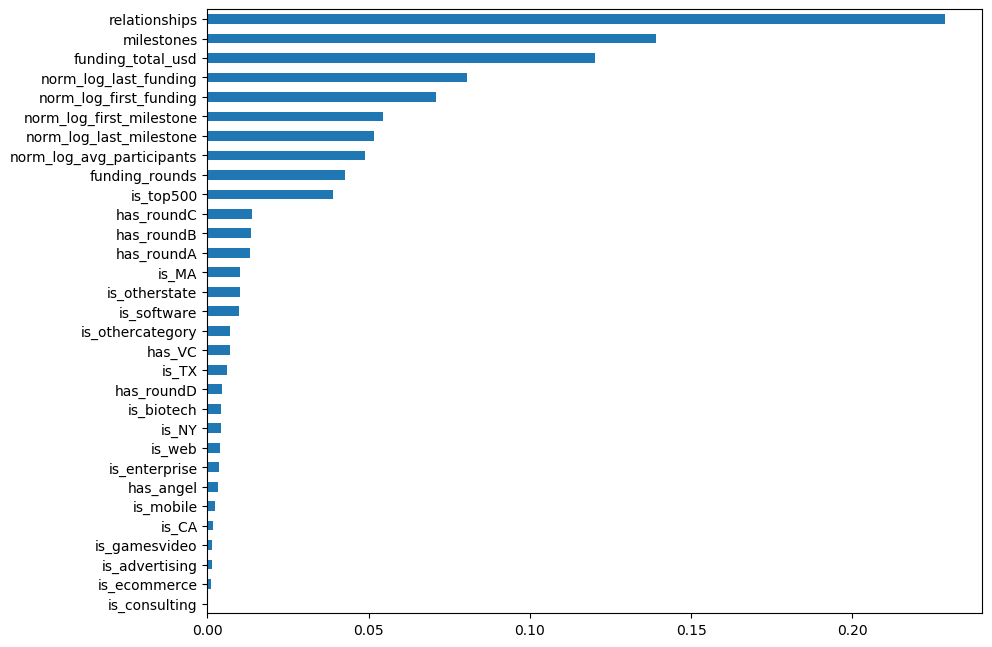

In [48]:
feature=pd.Series(data=forest.feature_importances_, index=X_train.columns)
feature_sort=feature.sort_values(ascending=True)
plt.figure(figsize=(10,8),dpi=100)
feature_sort.plot(kind="barh");


### Now, apply random forest with polynomial features

In [51]:
from sklearn.preprocessing import PolynomialFeatures

pf=PolynomialFeatures(degree=2)
pf.fit(X)

X_pf=pf.transform(X)
X_pf_df=pd.DataFrame(X_pf, columns=pf.get_feature_names(X.columns))
X_pf_df["status_closed"]=df_new["status_closed"]

X_poly=X_pf_df.drop(["1"],axis=1)
Y_poly=X_pf_df["status_closed"]


X_poly_train, X_poly_test, Y_poly_train, Y_poly_test = train_test_split(X_poly, Y_poly, test_size=0.30, random_state=42)

forest_poly=RandomForestClassifier(n_estimators=25
                                  )

forest_poly.fit(X_poly_train,Y_poly_train)

y_poly_test_pred=forest_poly.predict(X_poly_test)
y_poly_train_pred=forest_poly.predict(X_poly_train)

print("Accuracy of the poly test random forest:", accuracy_score(Y_poly_test,y_poly_test_pred))
print("Accuracy of the poly train random forest:", accuracy_score(Y_poly_train,y_poly_train_pred))


Accuracy of the poly test random forest: 0.8916967509025271
Accuracy of the poly train random forest: 0.9984520123839009


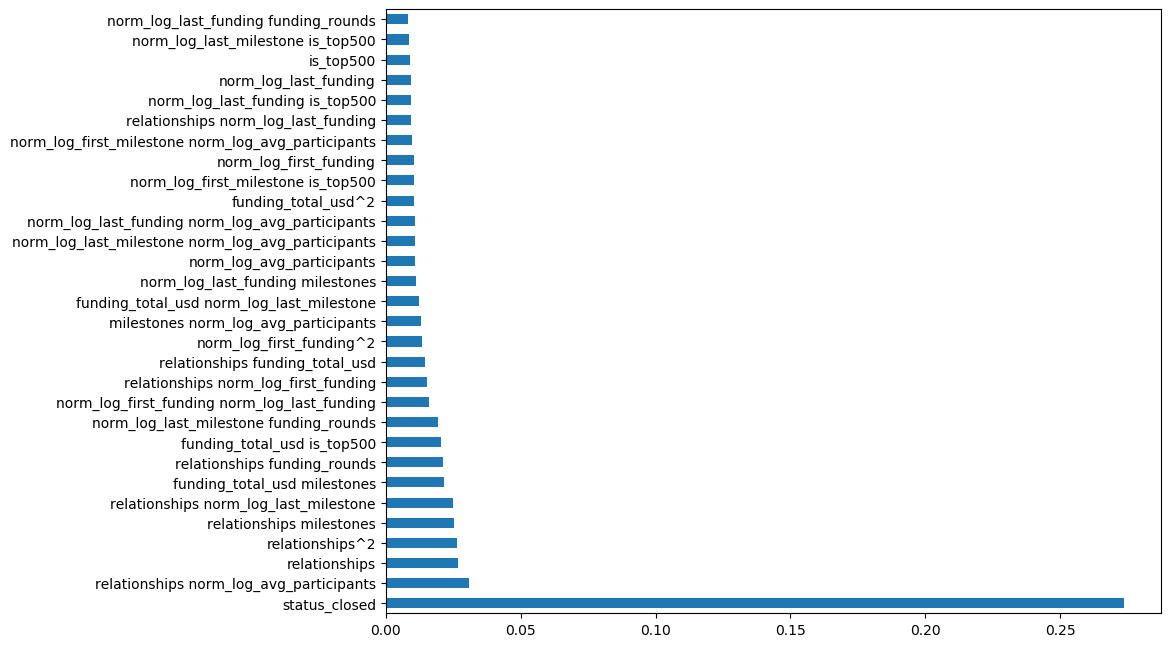

In [200]:
feature_poly=pd.Series(data=forest_poly.feature_importances_, index=X_poly_train.columns)
feature_poly_sort=feature_poly.sort_values(ascending=False).head(30)
feature_poly_sort

plt.figure(figsize=(10,8),dpi=100)
feature_poly_sort.plot(kind="barh");

In [52]:
feature_poly=pd.Series(data=forest_poly.feature_importances_, index=X_poly_train.columns)
feature_poly_sort=feature_poly.sort_values(ascending=False).head(30)
feature_poly_sort=pd.DataFrame(feature_poly_sort).T
feature_poly_sort.head(2)

,status_closed,relationships funding_rounds,relationships norm_log_last_milestone,relationships norm_log_last_funding,milestones norm_log_last_funding,relationships milestones,milestones norm_log_last_milestone,funding_total_usd is_top500,relationships funding_total_usd,is_top500 norm_log_last_milestone,funding_total_usd milestones,norm_log_last_milestone norm_log_avg_participants,is_top500 norm_log_first_milestone,funding_total_usd norm_log_last_milestone,milestones norm_log_first_milestone,relationships is_top500,funding_total_usd norm_log_avg_participants,relationships,norm_log_last_funding norm_log_avg_participants,funding_total_usd norm_log_first_milestone,norm_log_last_funding norm_log_last_milestone,milestones norm_log_avg_participants,funding_total_usd,is_top500 norm_log_avg_participants,norm_log_first_funding norm_log_last_milestone,norm_log_last_milestone^2,norm_log_first_funding^2,funding_rounds norm_log_last_milestone,norm_log_first_funding norm_log_first_milestone,funding_total_usd^2
0,0.142876,0.030598,0.030412,0.024897,0.022457,0.022199,0.019601,0.018034,0.015493,0.014393,0.013982,0.013534,0.01291,0.012291,0.011694,0.011679,0.011379,0.011204,0.010941,0.010253,0.01,0.009725,0.00956,0.00952,0.009508,0.009338,0.009014,0.008994,0.00891,0.008742


# ---------------------------------------With new features we'll continue------------------------------------

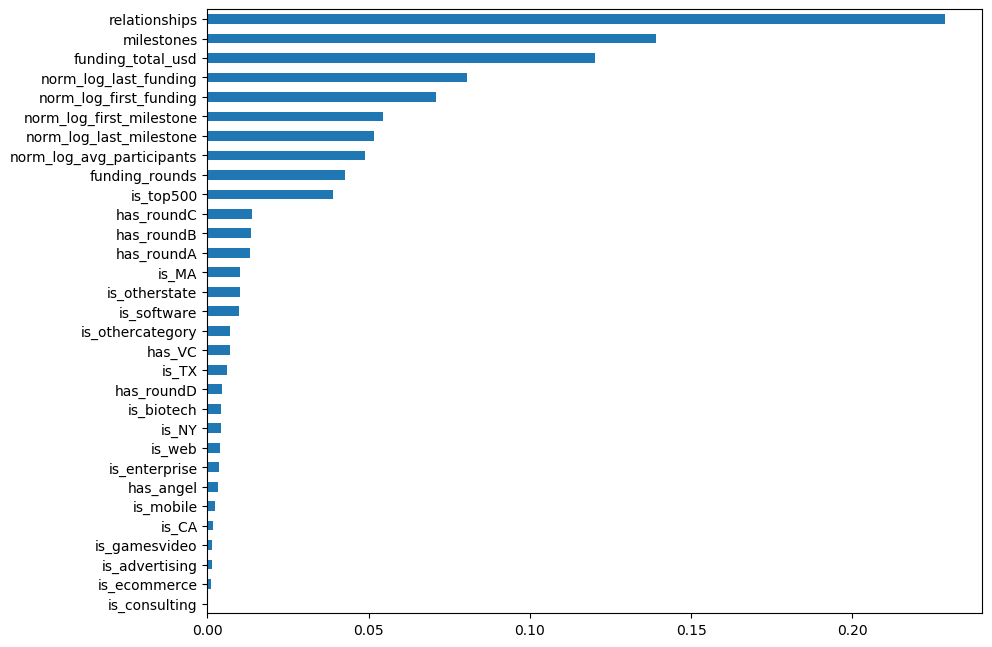

In [54]:
feature=pd.Series(data=forest.feature_importances_, index=X_train.columns)
feature_sort=feature.sort_values(ascending=True)
plt.figure(figsize=(10,8),dpi=100)
feature_sort.plot(kind="barh");

In [33]:
# Our new X and Y features have changed after apply the RandomForestClassifier

X = df_new[["relationships", "funding_total_usd", "norm_log_first_funding", "norm_log_last_funding", "norm_log_first_milestone", "norm_log_last_milestone","milestones", 
            "norm_log_avg_participants","is_top500", "funding_rounds", "is_TX","is_web" ,"is_NY", "is_CA", "is_MA","has_roundB", "is_software", "has_angel",
            "has_roundC","has_roundA","is_otherstate","is_enterprise","is_mobile"]]

Y=df_new["status_closed"]

# Logistic Regression

In [34]:
X=StandardScaler().fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=42, stratify=Y)

log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)


y_test_pred2=log_reg.predict(X_test)
y_train_pred2=log_reg.predict(X_train)

print("Accuracy of the Y_test: {:.4f}". format(accuracy_score(y_test_pred2,Y_test)))
print("Accuracy of the Y_test: {:.4f}". format(accuracy_score(y_train_pred2,Y_train)),"\n")
print("Confusion matrix:", "\n", confusion_matrix(Y_test, y_test_pred2))
print("Classification report:", "\n", classification_report(Y_test,y_test_pred2))

Accuracy of the Y_test: 0.7509
Accuracy of the Y_test: 0.7663 

Confusion matrix: 
 [[150  29]
 [ 40  58]]
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       179
           1       0.67      0.59      0.63        98

    accuracy                           0.75       277
   macro avg       0.73      0.71      0.72       277
weighted avg       0.75      0.75      0.75       277



In [91]:
param_log={"penalty":["l1","l2"],
          "solver":["lbfgs","liblinear"],
          "C":[10**x for x in range(-3,3,1)]
          }

grid_log=GridSearchCV(estimator=log_reg,
                     param_grid=param_log,
                     cv=10,
                     return_train_score=True)

grid_log.fit(X_train,Y_train)

print("Best parameters: ", grid_log.best_params_)
print("Best scores: ", grid_log.best_score_)

grid_log_df = pd.DataFrame(grid_log.cv_results_)
grid_log_df[["param_C","param_penalty","mean_test_score"]].sort_values(by=["mean_test_score"], ascending=False).head(10)

Best parameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best scores:  0.7493990384615385


,param_C,param_penalty,mean_test_score
7,0.01,l2,0.749399
9,0.1,l1,0.749327
13,1,l1,0.744615
14,1,l2,0.743053
22,100,l2,0.743053
21,100,l1,0.743053
19,10,l2,0.743053
18,10,l2,0.743053
17,10,l1,0.743053
23,100,l2,0.743053


# Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier


X = df_new[["relationships", "funding_total_usd", "norm_log_first_funding", "norm_log_last_funding", "norm_log_first_milestone", "norm_log_last_milestone","milestones", 
            "norm_log_avg_participants","is_top500", "funding_rounds", "is_TX","is_web" ,"is_NY", "is_CA", "is_MA","has_roundB", "is_software", "has_angel",
            "has_roundC","has_roundA","is_otherstate","is_enterprise","is_mobile"]]

Y=df_new["status_closed"]


X=StandardScaler().fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30, random_state=42)

forest=RandomForestClassifier(n_estimators=700,
                              criterion="entropy",
                              max_depth=5
                             )
forest.fit(X_train, Y_train)

y_test_forest_pred=forest.predict(X_test)
y_train_forest_pred=forest.predict(X_train)

print("Accuracy of the random forest test: {:.4f}".format(accuracy_score(y_test_forest_pred,Y_test)))
print("Accuracy of the random forest train: {:.4f}".format(accuracy_score(y_train_forest_pred,Y_train)),"\n")
print("Confusion matrix:", "\n", confusion_matrix(Y_test,y_test_forest_pred),"\n")
print("Classification", "\n", classification_report(Y_test, y_test_forest_pred))

Accuracy of the random forest test: 0.7870
Accuracy of the random forest train: 0.8452 

Confusion matrix: 
 [[168   9]
 [ 50  50]] 

Classification 
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       177
           1       0.85      0.50      0.63       100

    accuracy                           0.79       277
   macro avg       0.81      0.72      0.74       277
weighted avg       0.80      0.79      0.77       277



In [94]:
paramlar= {"n_estimators": np.arange(10,40,2),
        "criterion": ["gini", "entropy"],
        "max_depth": np.arange(1,7,1)}



grid_forest=GridSearchCV(estimator=forest,
                     param_grid=paramlar,
                      n_jobs=-1,
                      cv=10,
                      return_train_score=True
                     )

grid_forest.fit(X_train,Y_train)

print("Best parameters: ", grid_forest.best_params_)
print("Best scores:", grid_forest.best_score_)

forest_df=pd.DataFrame(grid_forest.cv_results_)
forest_df[["param_criterion","param_max_depth","param_n_estimators","mean_test_score"]].sort_values(by=["mean_test_score"], ascending=False).head(6)

Best parameters:  {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 16}
Best scores: 0.7956971153846155


,param_criterion,param_max_depth,param_n_estimators,mean_test_score
138,entropy,4,16,0.795697
136,entropy,4,12,0.792716
135,entropy,4,10,0.792668
47,gini,4,14,0.792620
156,entropy,5,22,0.792620
171,entropy,6,22,0.792572


# SVC

In [35]:
from sklearn.svm import SVC


X = df_new[["relationships", "funding_total_usd", "norm_log_first_funding", "norm_log_last_funding", "norm_log_first_milestone", "norm_log_last_milestone","milestones", 
            "norm_log_avg_participants","is_top500", "funding_rounds", "is_TX","is_web" ,"is_NY", "is_CA", "is_MA","has_roundB", "is_software", "has_angel",
            "has_roundC","has_roundA","is_otherstate","is_enterprise","is_mobile"]]
Y=df_new["status_closed"]



X=StandardScaler().fit_transform(X)

svc=SVC(kernel="rbf",
       C=1
       )

svc.fit(X_train,Y_train)
y_pred_svc=svc.predict(X_test)
y_pred_train_svc=svc.predict(X_train)

print("Accuracy of the SVC model: {:.4f}". format(accuracy_score(Y_test,y_pred_svc)))
print("Accuracy of the SVC model: {:.4f}". format(accuracy_score(Y_train,y_pred_train_svc)),"\n")
print("Confusion matrix:", "\n", confusion_matrix(Y_test,y_pred_svc))
print("Confusion matrix:", "\n", confusion_matrix(Y_train,y_pred_train_svc),"\n")
print("Classification report:","\n", classification_report(Y_test,y_pred_svc))

Accuracy of the SVC model: 0.7545
Accuracy of the SVC model: 0.8344 

Confusion matrix: 
 [[155  24]
 [ 44  54]]
Confusion matrix: 
 [[393  25]
 [ 82 146]] 

Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       179
           1       0.69      0.55      0.61        98

    accuracy                           0.75       277
   macro avg       0.74      0.71      0.72       277
weighted avg       0.75      0.75      0.75       277



In [ ]:
param_svc={"kernel":["linear", "poly", "rbf", "sigmoid"],
           "C":[10**y for y in range(-3,3,1)]
          }

grid_svc=GridSearchCV(estimator=svc,
                     cv=10,
                     param_grid=param_svc
                     )

grid_svc.fit(X_train,Y_train)

print("Best parameter of SVC model: ", grid_svc.best_params_)
print("Best score of SVC model: ", grid_svc.best_score_)

grid_svc_df=pd.DataFrame(grid_svc.cv_results_)
grid_svc_df[["param_C","param_kernel","mean_test_score"]].sort_values(by=["mean_test_score"], ascending=False).head(6)

# KNN

In [96]:
from sklearn.neighbors import KNeighborsClassifier

X = df_new[["relationships", "funding_total_usd", "norm_log_first_funding", "norm_log_last_funding", "norm_log_first_milestone", "norm_log_last_milestone","milestones", 
            "norm_log_avg_participants","is_top500", "funding_rounds", "is_TX","is_web" ,"is_NY", "is_CA", "is_MA","has_roundB", "is_software", "has_angel",
            "has_roundC","has_roundA","is_otherstate","is_enterprise","is_mobile"]]
Y=df_new["status_closed"]


knn=KNeighborsClassifier(n_neighbors=12,
                        weights="uniform",
                        n_jobs=-1)

knn.fit(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
y_pred_train_knn=knn.predict(X_train)

print("Accuracy of the test set with KNN algorithm: ", accuracy_score(Y_test,y_pred_knn))
print("Accuracy of the train set with KNN algorithm: ", accuracy_score(Y_train,y_pred_train_knn),"\n")
print("Confusion matrix of test set: ", "\n", confusion_matrix(Y_test,y_pred_knn))
print("Confusion matrix of train set: ", "\n", confusion_matrix(Y_train,y_pred_train_knn),"\n")
print("Classification report: ", "\n", classification_report(Y_test,y_pred_knn))

Accuracy of the test set with KNN algorithm:  0.7148014440433214
Accuracy of the train set with KNN algorithm:  0.7445820433436533 

Confusion matrix of test set:  
 [[159  18]
 [ 61  39]]
Confusion matrix of train set:  
 [[385  35]
 [130  96]] 

Classification report:  
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       177
           1       0.68      0.39      0.50       100

    accuracy                           0.71       277
   macro avg       0.70      0.64      0.65       277
weighted avg       0.71      0.71      0.69       277



In [211]:
param_knn={"n_neighbors":np.arange(5,25,1),
          "weights":["uniform", "distance"]
          }

grid_knn=GridSearchCV(estimator=knn,
                     param_grid=param_knn,
                     cv=10)

grid_knn.fit(X_train,Y_train)

print("The best parameter: ", grid_knn.best_params_)
print("The best score: ", grid_knn.best_score_)

grid_knn_df = grid_knn.cv_results_
grid_knn_df = pd.DataFrame(grid_knn_df)
grid_knn_df[["param_n_neighbors","param_weights","mean_test_score"]].sort_values(by=["mean_test_score"], ascending=False).head(6)


The best parameter:  {'n_neighbors': 23, 'weights': 'distance'}
The best score:  0.7227163461538462


,param_n_neighbors,param_weights,mean_test_score
37,23,distance,0.722716
20,15,uniform,0.718029
23,16,distance,0.718029
39,24,distance,0.716562
6,8,uniform,0.714976
24,17,uniform,0.714976


# XGBOOST

In [98]:
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [99]:
X = df_new[["relationships", "funding_total_usd", "norm_log_first_funding", "norm_log_last_funding", "norm_log_first_milestone", "norm_log_last_milestone","milestones", 
            "norm_log_avg_participants","is_top500", "funding_rounds", "is_TX","is_web" ,"is_NY", "is_CA", "is_MA","has_roundB", "is_software", "has_angel",
            "has_roundC","has_roundA","is_otherstate","is_enterprise","is_mobile"]]
Y=df_new["status_closed"]


xgb_dmatrix=xgb.DMatrix(data=X, label=Y)

params={"objective":"reg:logistic",
       "max_depth":3,
       "silent":1}

xgb_cv=xgb_df=xgb.cv(dtrain=xgb_dmatrix,
                    params=params,
                    nfold=3,
                    num_boost_round=5,
                    metrics="error",
                    as_pandas=True,
                    seed=123)

display(xgb_cv)

[21:40:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:40:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:40:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.204753,0.018650,0.262194,0.006336
1,0.187975,0.004085,0.253511,0.009292
2,0.177676,0.010955,0.234023,0.009652
3,0.172259,0.008576,0.226444,0.005868
4,0.173344,0.007691,0.225358,0.005770


In [100]:
print("Accuracy values: {:.3f}". format((1-xgb_cv["test-error-mean"]).max()))

Accuracy values: 0.775


In [101]:
xgb_auc = xgb.cv(dtrain=xgb_dmatrix,
                params=params,
                nfold=3,
                num_boost_round=5,
                metrics="auc",
                as_pandas=True,
                seed=123)

display(xgb_auc)

print("AUC Score: {:.3f}". format(xgb_auc["test-auc-mean"].max()))

[21:40:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:40:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:40:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings bu

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.799556,0.013505,0.736439,0.017382
1,0.841113,0.008367,0.775264,0.021673
2,0.863845,0.002995,0.791792,0.015191
3,0.875831,0.006840,0.801237,0.008141
4,0.882897,0.004879,0.803969,0.002801


AUC Score: 0.804


In [36]:
from xgboost import XGBClassifier

X = df_new[["relationships", "funding_total_usd", "norm_log_first_funding", "norm_log_last_funding", "norm_log_first_milestone", "norm_log_last_milestone","milestones", 
            "norm_log_avg_participants","is_top500", "funding_rounds", "is_TX","is_web" ,"is_NY", "is_CA", "is_MA","has_roundB", "is_software", "has_angel",
            "has_roundC","has_roundA","is_otherstate","is_enterprise","is_mobile"]]
Y=df_new["status_closed"]


xgb_model=XGBClassifier(objective='binary:logistic',
                       random_state=42,
                       eval_metric="auc")



X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=42)


xgb_model.fit(X_train,Y_train, early_stopping_rounds=5, eval_set=[(X_test,Y_test)])

y_test_xgboost_pred=xgb_model.predict(X_test)

print("Accuracy of XGBOOST: {:.4f} ". format(accuracy_score(Y_test,y_test_xgboost_pred)))

[0]	validation_0-auc:0.78596
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.81048
[2]	validation_0-auc:0.80797
[3]	validation_0-auc:0.81376
[4]	validation_0-auc:0.81387
[5]	validation_0-auc:0.82014
[6]	validation_0-auc:0.81328
[7]	validation_0-auc:0.81172
[8]	validation_0-auc:0.81449
[9]	validation_0-auc:0.81859
[10]	validation_0-auc:0.81333
Stopping. Best iteration:
[5]	validation_0-auc:0.82014

Accuracy of XGBOOST: 0.8123 


In [103]:
print("Best score: {0}, best iteration: {1}, best ntree limit: {2}".format(xgb_model.best_score,
                                                                           xgb_model.best_iteration,
                                                                           xgb_model.best_ntree_limit))

Best score: 0.820141, best iteration: 5, best ntree limit: 6


In [55]:
import joblib

joblib.dump(xgb_model, "xgb_model.joblib")

['xgb_model.joblib']

In [57]:
xgb_model= joblib.load(xgb_model.joblib)

AttributeError: 'XGBClassifier' object has no attribute 'joblib'

# -------------------------------All Applied Machine Learning Algorithm----------------------------------

In [104]:
log_performance=grid_log_df[["param_C","param_penalty","mean_test_score"]].sort_values(by=["mean_test_score"], ascending=False).head(10).reset_index()
forest_performance=forest_df[["param_criterion","param_max_depth","param_n_estimators","mean_test_score"]].sort_values(by=["mean_test_score"], ascending=False).head(10).reset_index()
svc_performance=grid_svc_df[["param_C","param_kernel","mean_test_score"]].sort_values(by=["mean_test_score"], ascending=False).head(10).reset_index()
knn_performance=grid_knn_df[["param_n_neighbors","param_weights","mean_test_score"]].sort_values(by=["mean_test_score"], ascending=False).head(10).reset_index()

log_performance.rename(columns={"param_C":"log_param_C",
                               "param_penalty":"log_param_penalty",
                               "mean_test_score":"log_mean_test_score"}, inplace=True)

forest_performance.rename(columns={"param_criterion":"forest_param_criterion",
                                  "param_max_depth":"forest_param_max_depth",
                                  "param_n_estimators":"forest_param_n_estimators",
                                  "mean_test_score":"forest_mean_test_score"}, inplace=True)

svc_performance.rename(columns={"param_C":"svc_param_C",
                               "param_kernel":"svc_param_kernel",
                               "mean_test_score":"svc_mean_test_score"}, inplace=True)

knn_performance.rename(columns={"param_n_neighbors":"knn_param_n_neighbors",
                               "param_weights":"knn_param_weights",
                               "mean_test_score":"knn_mean_test_score"}, inplace=True)


pd.concat([log_performance["log_mean_test_score"],forest_performance["forest_mean_test_score"],svc_performance["svc_mean_test_score"],
           knn_performance["knn_mean_test_score"]], axis=1).head(3)

NameError: name 'grid_svc_df' is not defined

# --------------------------------The best score is XGBOOST algorithm------------------------------